## Import libraries

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.decomposition import PCA
from sklearn.impute import IterativeImputer, KNNImputer
from scipy.stats import median_abs_deviation
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from IPython.display import Image


## Load dataset


In [274]:
data0=pd.read_csv('HeartDiseaseTrain-Test.csv')
data0.head()

age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0  52.0    Male  Typical angina                   125.0   212.000000   
1   NaN    Male  Typical angina                   140.0   203.000000   
2  70.0    Male  Typical angina                   145.0   174.000000   
3   NaN    Male  Typical angina                   148.0   448.084179   
4  62.0  Female  Typical angina                   138.0   487.020946   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality      228.034204   
1  Greater than 120 mg/ml                 Normal      256.195943   
2    Lower than 120 mg/ml  ST-T wave abnormality      305.677800   
3    Lower than 120 mg/ml                    NaN      161.000000   
4  Greater than 120 mg/ml  ST-T wave abnormality      106.000000   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1                     Yes      NaN    Upsloping                          Zero   
2                     Yes      2.6    Upsloping                          Zero   
3                      No      0.0  Downsloping                           One   
4                      No      1.9         Flat                         Three   

         thalassemia  target  
0  Reversable Defect       0  
1  Reversable Defect       0  
2  Reversable Defect       0  
3  Reversable Defect       0  
4       Fixed Defect       0

In [275]:
data0.shape

(1025, 14)

In [276]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            871 non-null    float64
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   float64
 4   cholestoral                    1025 non-null   float64
 5   fasting_blood_sugar            871 non-null    object 
 6   rest_ecg                       871 non-null    object 
 7   Max_heart_rate                 1025 non-null   float64
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        871 non-null    float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  871 non-null    object 
 12  thalassemia                    871 non-null    o

In [277]:
data0.describe()

age  resting_blood_pressure  cholestoral  Max_heart_rate  \
count  871.000000             1025.000000  1025.000000     1025.000000   
mean    54.466131              152.885028   307.954582      176.848631   
std      9.053529               45.515629   133.486648       59.644668   
min     29.000000               94.000000   126.000000       71.000000   
25%     48.000000              122.000000   220.000000      142.000000   
50%     56.000000              136.000000   256.000000      160.000000   
75%     61.000000              160.000000   325.000000      179.000000   
max     77.000000              289.302451   680.357494      373.160824   

          oldpeak       target  
count  871.000000  1025.000000  
mean     1.069920     0.513171  
std      1.155831     0.500070  
min      0.000000     0.000000  
25%      0.000000     0.000000  
50%      0.800000     1.000000  
75%      1.800000     1.000000  
max      6.200000     1.000000

## Preprocessing     

## 1. Handling missing values

In [278]:
data = data0.copy()

In [279]:
data.isnull().sum()

age                              154
sex                                0
chest_pain_type                    0
resting_blood_pressure             0
cholestoral                        0
fasting_blood_sugar              154
rest_ecg                         154
Max_heart_rate                     0
exercise_induced_angina            0
oldpeak                          154
slope                              0
vessels_colored_by_flourosopy    154
thalassemia                      154
target                             0
dtype: int64

In [280]:
data.isnull().sum()/data.shape[0]*100

age                              15.02439
sex                               0.00000
chest_pain_type                   0.00000
resting_blood_pressure            0.00000
cholestoral                       0.00000
fasting_blood_sugar              15.02439
rest_ecg                         15.02439
Max_heart_rate                    0.00000
exercise_induced_angina           0.00000
oldpeak                          15.02439
slope                             0.00000
vessels_colored_by_flourosopy    15.02439
thalassemia                      15.02439
target                            0.00000
dtype: float64

In [281]:
mode_imputer = SimpleImputer(strategy='most_frequent')
columns_to_impute_mode = ["age","rest_ecg", "fasting_blood_sugar", "vessels_colored_by_flourosopy","thalassemia"]

data[columns_to_impute_mode] = mode_imputer.fit_transform(data[columns_to_impute_mode])


In [282]:
data.isnull().sum()

age                                0
sex                                0
chest_pain_type                    0
resting_blood_pressure             0
cholestoral                        0
fasting_blood_sugar                0
rest_ecg                           0
Max_heart_rate                     0
exercise_induced_angina            0
oldpeak                          154
slope                              0
vessels_colored_by_flourosopy      0
thalassemia                        0
target                             0
dtype: int64

In [283]:
mean_imputer = SimpleImputer(strategy='mean')
columns_to_impute_mean = ['oldpeak']

data[columns_to_impute_mean] = mean_imputer.fit_transform(data[columns_to_impute_mean])

In [284]:
data.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [285]:
knn_imputer = KNNImputer(n_neighbors=2)
columns_to_impute = ["Max_heart_rate"]

data[columns_to_impute] = knn_imputer.fit_transform(data[columns_to_impute])

In [286]:
data.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [287]:
columns_to_impute = ['resting_blood_pressure', 'cholestoral']

subset = data[columns_to_impute]

imputer = IterativeImputer(max_iter=10, random_state=0)

imputed_array = imputer.fit_transform(subset)

imputed_subset = pd.DataFrame(imputed_array, columns=columns_to_impute)

data[columns_to_impute] = imputed_subset

In [288]:
data.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [289]:
data

age     sex  chest_pain_type  resting_blood_pressure  cholestoral  \
0     52.0    Male   Typical angina                   125.0   212.000000   
1     58.0    Male   Typical angina                   140.0   203.000000   
2     70.0    Male   Typical angina                   145.0   174.000000   
3     58.0    Male   Typical angina                   148.0   448.084179   
4     62.0  Female   Typical angina                   138.0   487.020946   
...    ...     ...              ...                     ...          ...   
1020  59.0    Male  Atypical angina                   140.0   221.000000   
1021  60.0    Male   Typical angina                   125.0   258.000000   
1022  47.0    Male   Typical angina                   110.0   275.000000   
1023  50.0  Female   Typical angina                   110.0   254.000000   
1024  54.0    Male   Typical angina                   120.0   188.000000   

         fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0       Lower than 120 mg/ml  ST-T wave abnormality      228.034204   
1     Greater than 120 mg/ml                 Normal      256.195943   
2       Lower than 120 mg/ml  ST-T wave abnormality      305.677800   
3       Lower than 120 mg/ml  ST-T wave abnormality      161.000000   
4     Greater than 120 mg/ml  ST-T wave abnormality      106.000000   
...                      ...                    ...             ...   
1020    Lower than 120 mg/ml  ST-T wave abnormality      164.000000   
1021    Lower than 120 mg/ml                 Normal      141.000000   
1022    Lower than 120 mg/ml  ST-T wave abnormality      118.000000   
1023    Lower than 120 mg/ml                 Normal      159.000000   
1024    Lower than 120 mg/ml  ST-T wave abnormality      113.000000   

     exercise_induced_angina  oldpeak        slope  \
0                         No  1.00000  Downsloping   
1                        Yes  1.06992    Upsloping   
2                        Yes  2.60000    Upsloping   
3                         No  0.00000  Downsloping   
4                         No  1.90000         Flat   
...                      ...      ...          ...   
1020                     Yes  0.00000  Downsloping   
1021                     Yes  2.80000         Flat   
1022                     Yes  1.00000         Flat   
1023                      No  1.06992  Downsloping   
1024                      No  1.40000         Flat   

     vessels_colored_by_flourosopy        thalassemia  target  
0                              Two  Reversable Defect       0  
1                             Zero  Reversable Defect       0  
2                             Zero  Reversable Defect       0  
3                              One  Reversable Defect       0  
4                            Three       Fixed Defect       0  
...                            ...                ...     ...  
1020                          Zero       Fixed Defect       1  
1021                          Zero       Fixed Defect       0  
1022                          Zero       Fixed Defect       0  
1023                          Zero       Fixed Defect       1  
1024                           One  Reversable Defect       0  

[1025 rows x 14 columns]

In [290]:
numeric_cols = data.select_dtypes(include=[np.number]).columns

skew_values = data[numeric_cols].skew().sort_values(ascending=False)

print("Skew values for numeric columns:\n")
print(skew_values)

Skew values for numeric columns:

oldpeak                   1.328659
cholestoral               1.258880
resting_blood_pressure    1.225590
Max_heart_rate            1.174191
target                   -0.052778
dtype: float64


In [291]:

numeric_cols = data.select_dtypes(include=[np.number]).columns

skew_values = data[numeric_cols].skew().sort_values(ascending=False)

high_skew_cols = skew_values[skew_values > 1].index

print("Columns with skewness > 1:\n")
print(high_skew_cols)


Columns with skewness > 1:

Index(['oldpeak', 'cholestoral', 'resting_blood_pressure', 'Max_heart_rate'], dtype='object')


In [292]:
for col in high_skew_cols:
    data.loc[:, f'log_{col}'] = data[col].apply(lambda x: np.log1p(x) if x >= 0 else np.nan)
    print(f"log1p applied to: {col} → new column: log_{col}")


log1p applied to: oldpeak → new column: log_oldpeak
log1p applied to: cholestoral → new column: log_cholestoral
log1p applied to: resting_blood_pressure → new column: log_resting_blood_pressure
log1p applied to: Max_heart_rate → new column: log_Max_heart_rate


In [293]:
for col in high_skew_cols:
    data.loc[:, f'log_{col}'] = data[col].apply(lambda x: np.log1p(x) if x >= 0 else np.nan)
    print(f"log1p applied to: {col} → new column: log_{col}")

skew_after_transformation = data[[f'log_{col}' for col in high_skew_cols]].skew().sort_values(ascending=False)

print("\nSkew after log1p transformation:")
print(skew_after_transformation)


log1p applied to: oldpeak → new column: log_oldpeak
log1p applied to: cholestoral → new column: log_cholestoral
log1p applied to: resting_blood_pressure → new column: log_resting_blood_pressure
log1p applied to: Max_heart_rate → new column: log_Max_heart_rate

Skew after log1p transformation:
log_resting_blood_pressure    0.912581
log_cholestoral               0.778506
log_Max_heart_rate            0.617579
log_oldpeak                   0.227102
dtype: float64


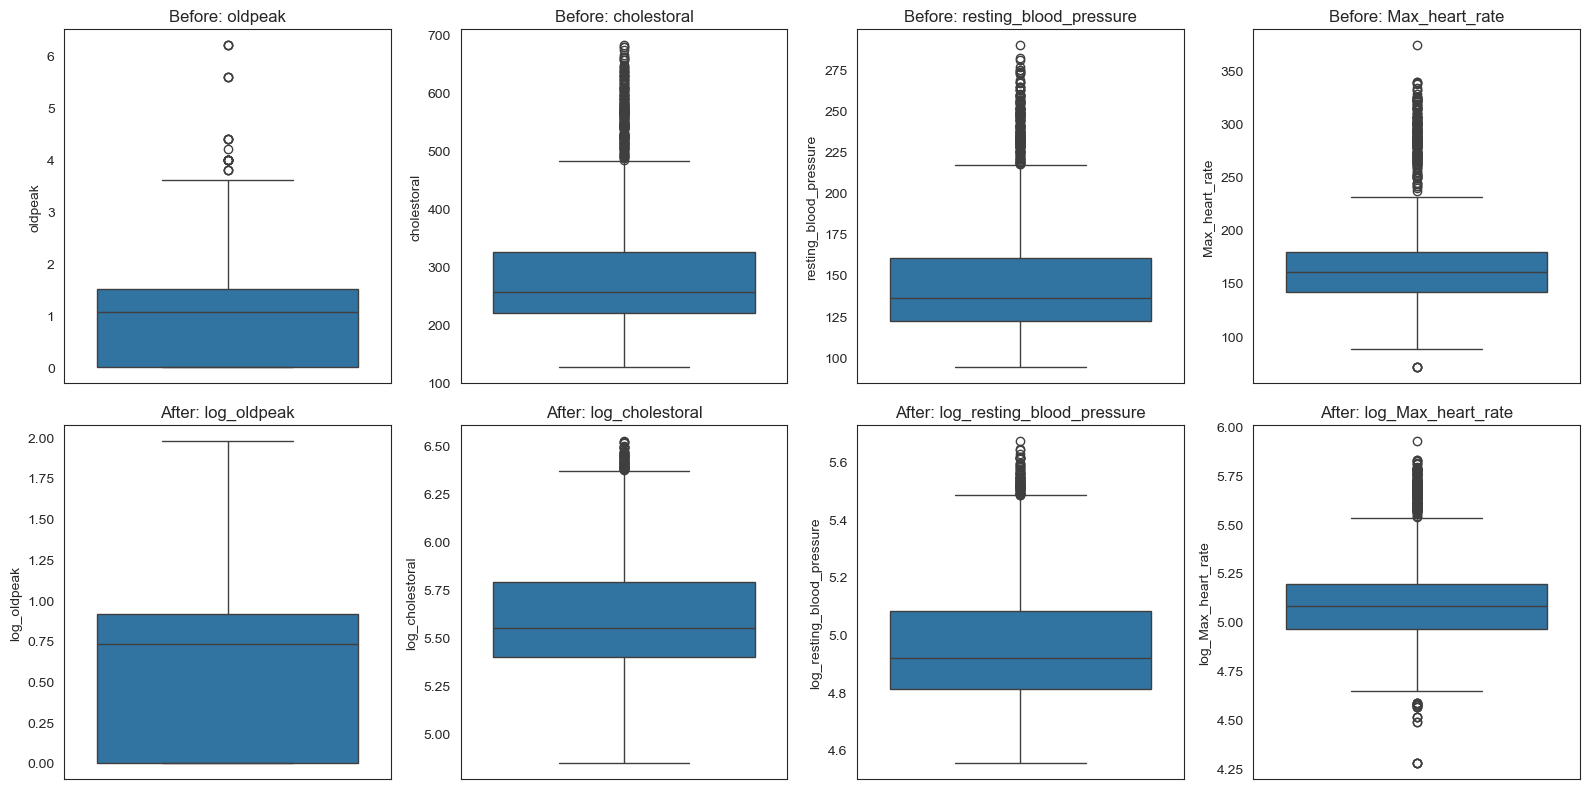

In [294]:

columns_to_check = ['oldpeak', 'cholestoral', 'resting_blood_pressure', 'Max_heart_rate']

plt.figure(figsize=(16, 8))  

for i, col in enumerate(columns_to_check):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Before: {col}')

for i, col in enumerate(columns_to_check):
    plt.subplot(2, 4, i + 5)
    sns.boxplot(y=data[f'log_{col}'])
    plt.title(f'After: log_{col}')

plt.tight_layout()
plt.show()


In [295]:
data_viz = data.copy()

## 2. Encoding

In [296]:
data.dtypes

age                               object
sex                               object
chest_pain_type                   object
resting_blood_pressure           float64
cholestoral                      float64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                   float64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
log_oldpeak                      float64
log_cholestoral                  float64
log_resting_blood_pressure       float64
log_Max_heart_rate               float64
dtype: object

In [297]:
data[['sex','chest_pain_type','fasting_blood_sugar','rest_ecg','exercise_induced_angina','slope','thalassemia','vessels_colored_by_flourosopy']] = data[['sex','chest_pain_type','fasting_blood_sugar','rest_ecg','exercise_induced_angina','slope','thalassemia','vessels_colored_by_flourosopy']].astype('category')
print(data.dtypes)

age                                object
sex                              category
chest_pain_type                  category
resting_blood_pressure            float64
cholestoral                       float64
fasting_blood_sugar              category
rest_ecg                         category
Max_heart_rate                    float64
exercise_induced_angina          category
oldpeak                           float64
slope                            category
vessels_colored_by_flourosopy    category
thalassemia                      category
target                              int64
log_oldpeak                       float64
log_cholestoral                   float64
log_resting_blood_pressure        float64
log_Max_heart_rate                float64
dtype: object


In [298]:
categorical_cols = ['sex',
    'chest_pain_type',
    'fasting_blood_sugar',
    'rest_ecg',
    'exercise_induced_angina',
    'slope',
    'thalassemia',
    'vessels_colored_by_flourosopy']

In [299]:
encoder = LabelEncoder()

columns = ['sex',
    'chest_pain_type',
    'rest_ecg',
    'exercise_induced_angina',
    'slope',
    'thalassemia']

data[columns] = data[columns].apply(encoder.fit_transform)

In [300]:
encoder = OneHotEncoder(sparse_output=False)

status_encoded = encoder.fit_transform(data[['vessels_colored_by_flourosopy','fasting_blood_sugar']])

status_columns = encoder.get_feature_names_out(['vessels_colored_by_flourosopy','fasting_blood_sugar'])

status_encoded_df = pd.DataFrame(status_encoded, columns=status_columns)
 
data = pd.concat([data, status_encoded_df], axis=1)

data = data.drop(columns=['vessels_colored_by_flourosopy','fasting_blood_sugar'])

In [301]:
data

age  sex  chest_pain_type  resting_blood_pressure  cholestoral  \
0     52.0    1                3                   125.0   212.000000   
1     58.0    1                3                   140.0   203.000000   
2     70.0    1                3                   145.0   174.000000   
3     58.0    1                3                   148.0   448.084179   
4     62.0    0                3                   138.0   487.020946   
...    ...  ...              ...                     ...          ...   
1020  59.0    1                1                   140.0   221.000000   
1021  60.0    1                3                   125.0   258.000000   
1022  47.0    1                3                   110.0   275.000000   
1023  50.0    0                3                   110.0   254.000000   
1024  54.0    1                3                   120.0   188.000000   

      rest_ecg  Max_heart_rate  exercise_induced_angina  oldpeak  slope  ...  \
0            2      228.034204                        0  1.00000      0  ...   
1            1      256.195943                        1  1.06992      2  ...   
2            2      305.677800                        1  2.60000      2  ...   
3            2      161.000000                        0  0.00000      0  ...   
4            2      106.000000                        0  1.90000      1  ...   
...        ...             ...                      ...      ...    ...  ...   
1020         2      164.000000                        1  0.00000      0  ...   
1021         1      141.000000                        1  2.80000      1  ...   
1022         2      118.000000                        1  1.00000      1  ...   
1023         1      159.000000                        0  1.06992      0  ...   
1024         2      113.000000                        0  1.40000      1  ...   

      log_cholestoral  log_resting_blood_pressure  log_Max_heart_rate  \
0            5.361292                    4.836282            5.433871   
1            5.318120                    4.948760            5.549838   
2            5.164786                    4.983607            5.725798   
3            6.107210                    5.003946            5.087596   
4            6.190358                    4.934474            4.672829   
...               ...                         ...                 ...   
1020         5.402677                    4.948760            5.105945   
1021         5.556828                    4.836282            4.955827   
1022         5.620401                    4.709530            4.779123   
1023         5.541264                    4.709530            5.075174   
1024         5.241747                    4.795791            4.736198   

      vessels_colored_by_flourosopy_Four  vessels_colored_by_flourosopy_One  \
0                                    0.0                                0.0   
1                                    0.0                                0.0   
2                                    0.0                                0.0   
3                                    0.0                                1.0   
4                                    0.0                                0.0   
...                                  ...                                ...   
1020                                 0.0                                0.0   
1021                                 0.0                                0.0   
1022                                 0.0                                0.0   
1023                                 0.0                                0.0   
1024                                 0.0                                1.0   

      vessels_colored_by_flourosopy_Three  vessels_colored_by_flourosopy_Two  \
0                                     0.0                                1.0   
1                                     0.0                                0.0   
2                                     0.0                                0.0   
3                      

## 3. Outliers

In [302]:
feature_list = ['resting_blood_pressure', 'cholestoral', 'Max_heart_rate','oldpeak']

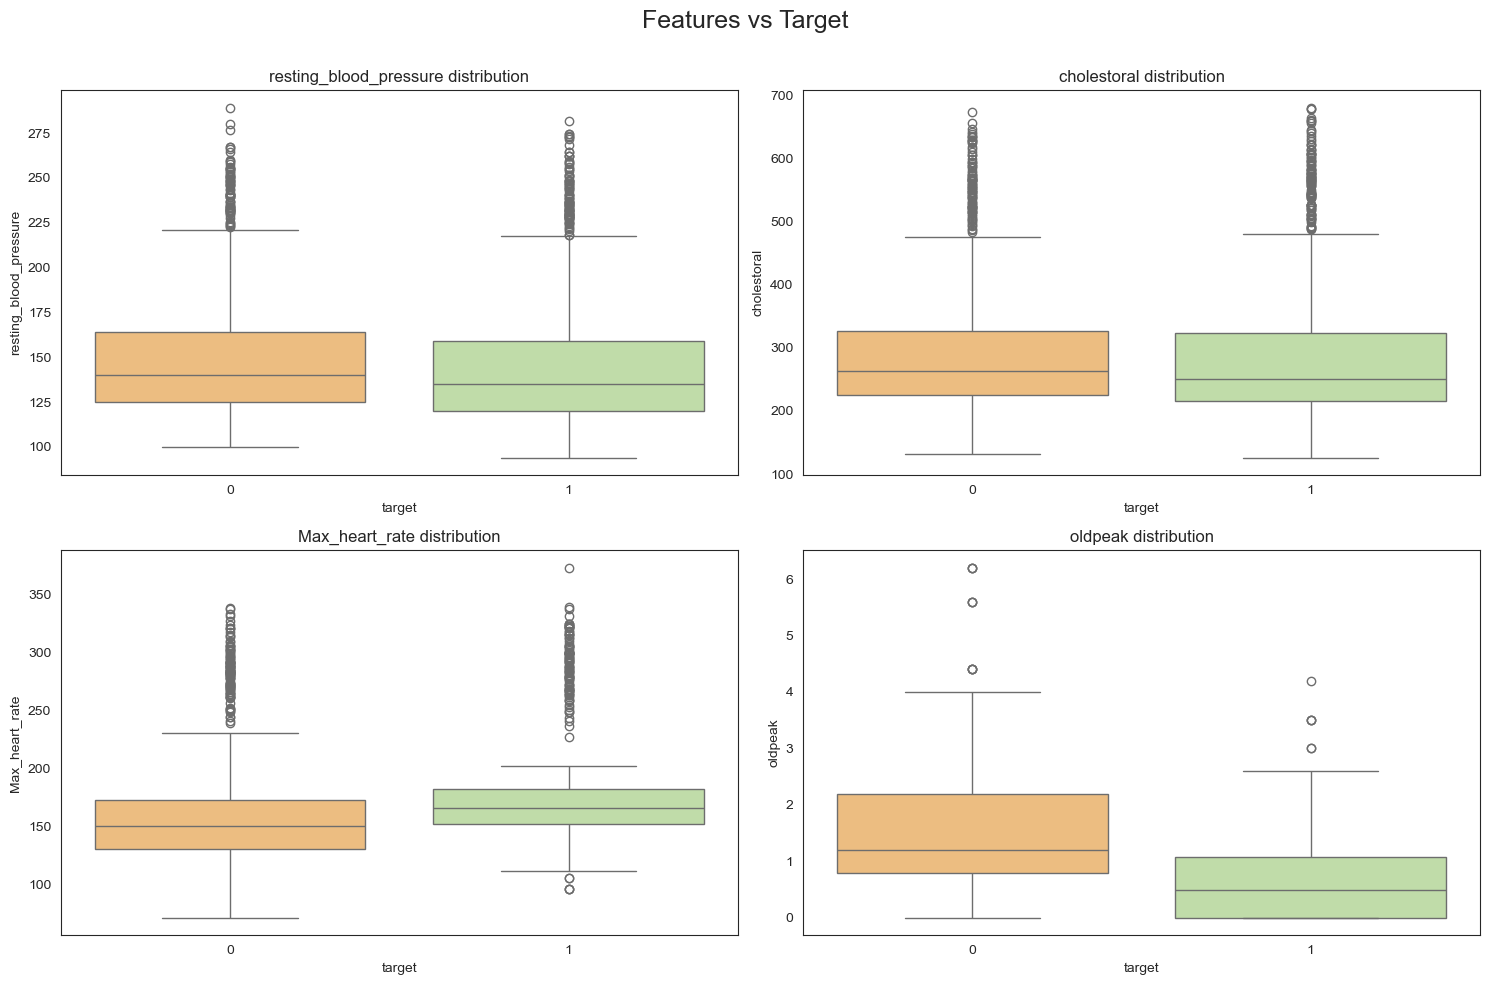

In [303]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Features vs Target\n', size=18)

sns.boxplot(ax=axes[0, 0], data=data, x='target', y='resting_blood_pressure', hue='target', palette='Spectral', legend=False)
axes[0, 0].set_title("resting_blood_pressure distribution")

sns.boxplot(ax=axes[0, 1], data=data, x='target', y='cholestoral', hue='target', palette='Spectral', legend=False)
axes[0, 1].set_title("cholestoral distribution")

sns.boxplot(ax=axes[1, 0], data=data, x='target', y='Max_heart_rate', hue='target', palette='Spectral', legend=False)
axes[1, 0].set_title("Max_heart_rate distribution")

sns.boxplot(ax=axes[1, 1], data=data, x='target', y='oldpeak', hue='target', palette='Spectral', legend=False)
axes[1, 1].set_title("oldpeak distribution")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

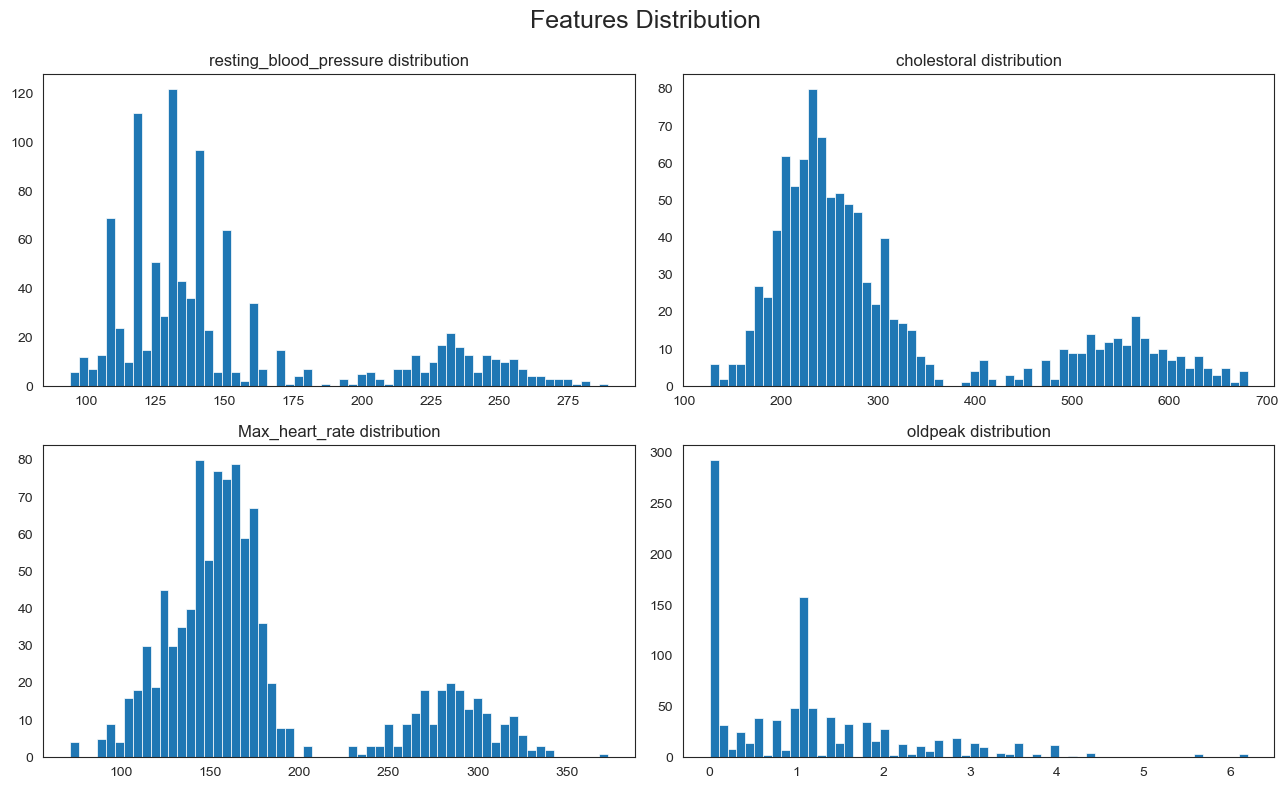

In [304]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 8))
fig.suptitle('Features Distribution\n', size=18)

axes[0,0].hist(data['resting_blood_pressure'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("resting_blood_pressure distribution")

axes[0,1].hist(data['cholestoral'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("cholestoral distribution")

axes[1,0].hist(data['Max_heart_rate'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("Max_heart_rate distribution")

axes[1,1].hist(data['oldpeak'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("oldpeak distribution")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


In [305]:
img = 'iqr.png'
Image(url=img, width=800)

def IQR_method(data, features): 
    outlier_indices = []

    total_outliers = 0

    for column in features:
        Q1 = np.percentile(data[column], 25)
        Q3 = np.percentile(data[column], 75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        outliers = data[(data[column] < Q1 - outlier_step) | (data[column] > Q3 + outlier_step)]
        
        outlier_indices.extend(outliers.index)

        total_outliers += outliers.shape[0]

    print('Total number of outlier values (across all features):', total_outliers)

    unique_outlier_rows = list(set(outlier_indices))

    return unique_outlier_rows


In [306]:
Outliers_IQR = IQR_method(data, feature_list)
df_out = data.drop(Outliers_IQR, axis=0).reset_index(drop=True)


Total number of outlier values (across all features): 596


In [307]:
print("Before deleting outliers", data.shape)
print("After deleting outliers", df_out.shape)

Before deleting outliers (1025, 23)
After deleting outliers (539, 23)


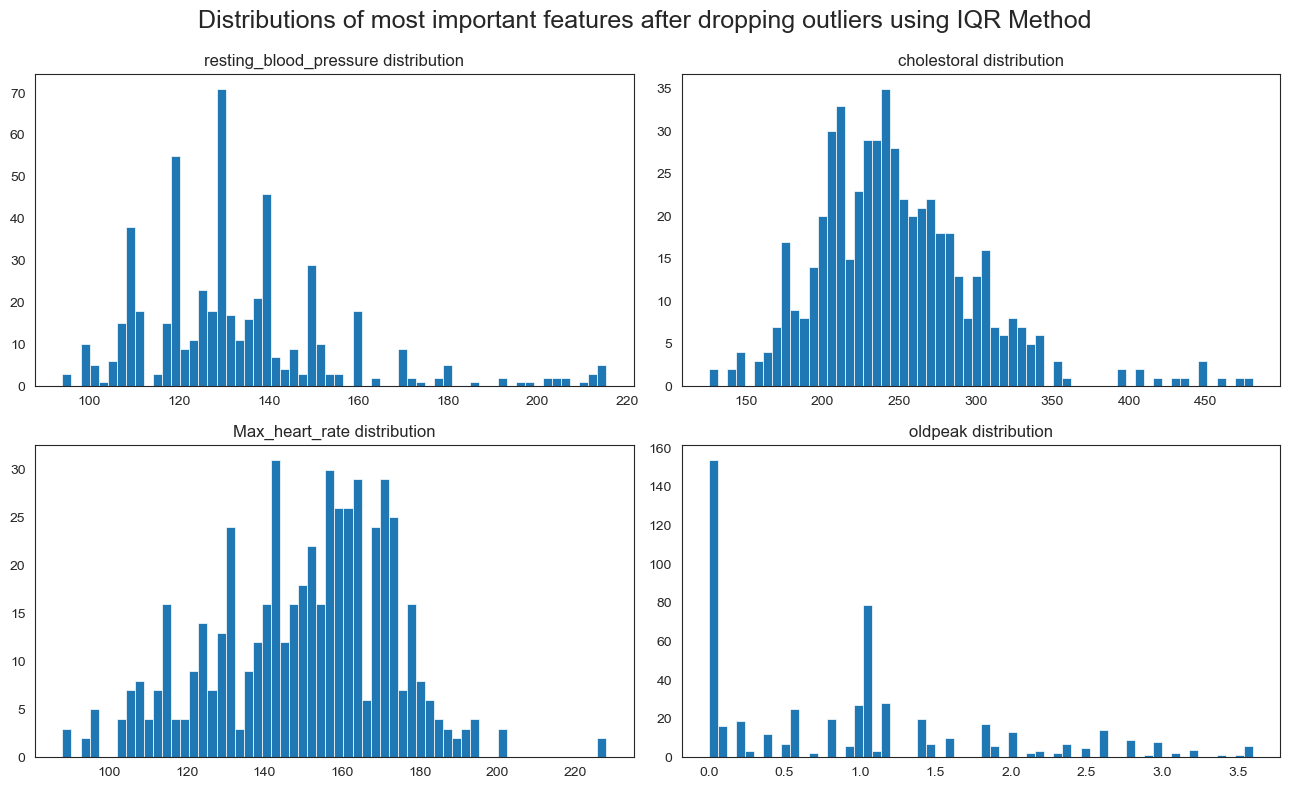

In [308]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 8))
fig.suptitle('Distributions of most important features after dropping outliers using IQR Method\n', size = 18)

axes[0,0].hist(df_out['resting_blood_pressure'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("resting_blood_pressure distribution")

axes[0,1].hist(df_out['cholestoral'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("cholestoral distribution")

axes[1,0].hist(df_out['Max_heart_rate'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("Max_heart_rate distribution")

axes[1,1].hist(df_out['oldpeak'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("oldpeak distribution")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [309]:
img = 'standard.jpg'
Image(url=img, width=800)

def StDev_method_all_outliers(data, features):
    outlier_indices = []
    total_outliers = 0

    for column in features:
        data_mean = data[column].mean()
        data_std = data[column].std()

        cut_off = data_std * 3

        outliers = data[(data[column] < data_mean - cut_off) | (data[column] > data_mean + cut_off)]

        outlier_indices.extend(outliers.index)
        total_outliers += outliers.shape[0]

    print('Total number of outlier values (across all features):', total_outliers)

    unique_outlier_rows = list(set(outlier_indices))
    return unique_outlier_rows

In [310]:
Outliers_StDev = StDev_method_all_outliers(data, feature_list)
df_out2 = data.drop(Outliers_StDev, axis=0).reset_index(drop=True)

Total number of outlier values (across all features): 11


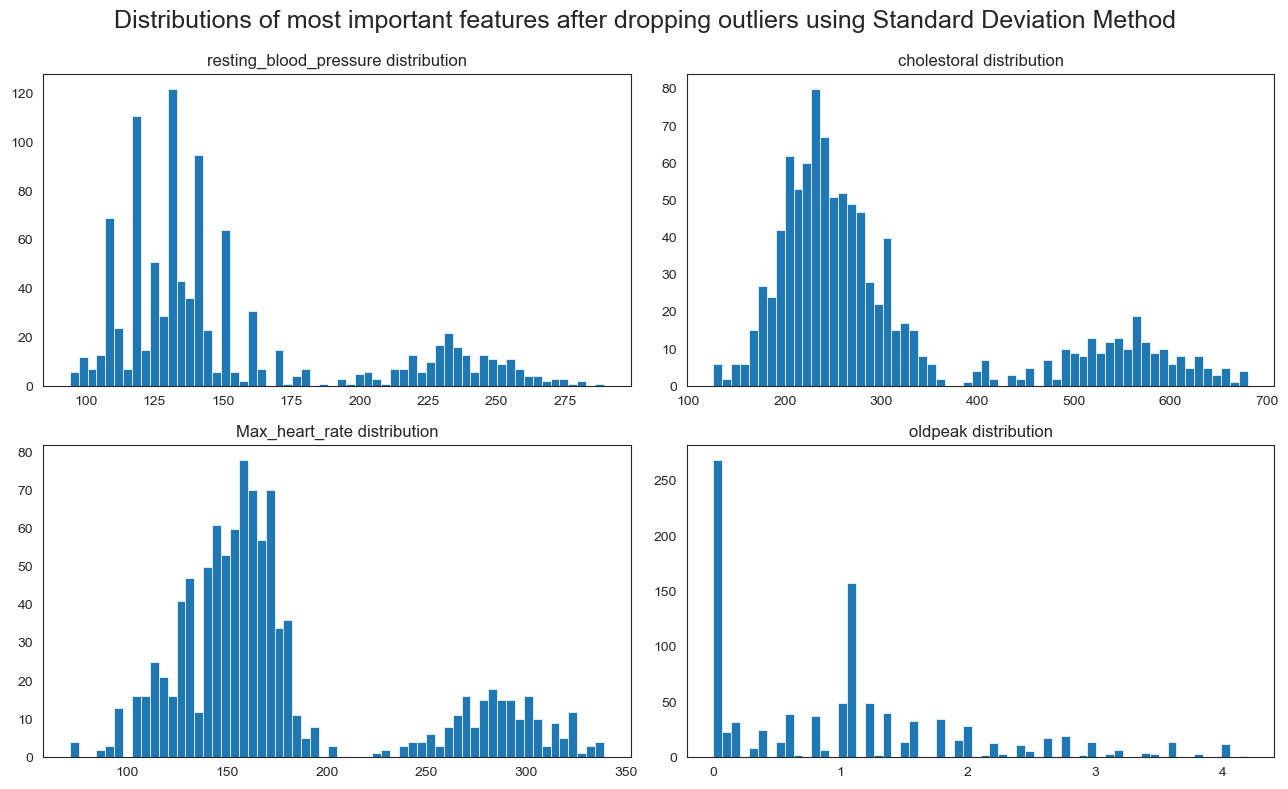

In [311]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 8))
fig.suptitle('Distributions of most important features after dropping outliers using Standard Deviation Method\n', size = 18)

axes[0,0].hist(df_out2['resting_blood_pressure'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,00].set_title("resting_blood_pressure distribution")

axes[0,1].hist(df_out2['cholestoral'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("cholestoral distribution")

axes[1,0].hist(df_out2['Max_heart_rate'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("Max_heart_rate distribution")

axes[1,1].hist(df_out2['oldpeak'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("oldpeak distribution")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [312]:
img = 'zscore.png'
Image(url=img, width=800)

def z_score(data, features):
    outlier_list = []
    total_outliers = 0
    threshold = 3

    for column in features:
        data_mean = data[column].mean()
        data_std = data[column].std()

        z_score = abs((data[column] - data_mean) / data_std)
        outliers = data[z_score > threshold]

        outlier_list.extend(outliers.index)
        total_outliers += outliers.shape[0]

    print('Total number of outlier values (across all features):', total_outliers)

    unique_outlier_rows = list(set(outlier_list))
    return unique_outlier_rows

In [313]:
Outliers_z_score = z_score(data, feature_list)
df_out3 = data.drop(Outliers_z_score, axis=0).reset_index(drop=True)

Total number of outlier values (across all features): 11


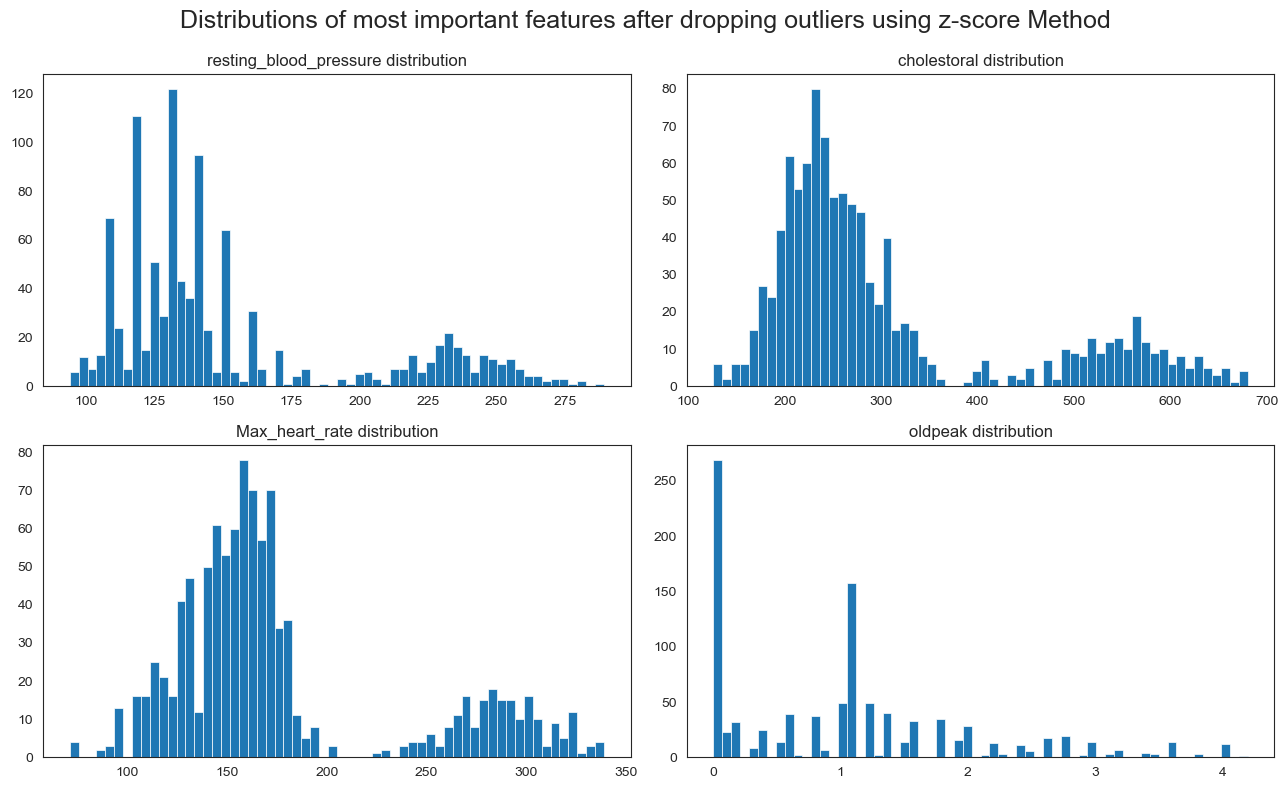

In [314]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 8))
fig.suptitle('Distributions of most important features after dropping outliers using z-score Method\n', size = 18)

axes[0,0].hist(df_out3['resting_blood_pressure'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,00].set_title("resting_blood_pressure distribution")

axes[0,1].hist(df_out3['cholestoral'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("cholestoral distribution")

axes[1,0].hist(df_out3['Max_heart_rate'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("Max_heart_rate distribution")

axes[1,1].hist(df_out3['oldpeak'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("oldpeak distribution")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [315]:
img = 'mod.png'
Image(url=img, width=800)

def z_scoremod_method(data, features):
    outlier_list = []
    total_outliers = 0
    threshold = 3

    for column in features:
        MAD = median_abs_deviation(data[column])
        mod_z_score = abs(0.6745 * (data[column] - data[column].median()) / MAD)

        outliers = data[mod_z_score > threshold]
        outlier_list.extend(outliers.index)
        total_outliers += outliers.shape[0]

    print('Total number of outlier values (across all features):', total_outliers)

    unique_outlier_rows = list(set(outlier_list))
    return unique_outlier_rows

In [316]:
Outliers_mod_z = z_scoremod_method(data, feature_list)
df_out4 = data.drop(Outliers_mod_z, axis=0).reset_index(drop=True)

Total number of outlier values (across all features): 591


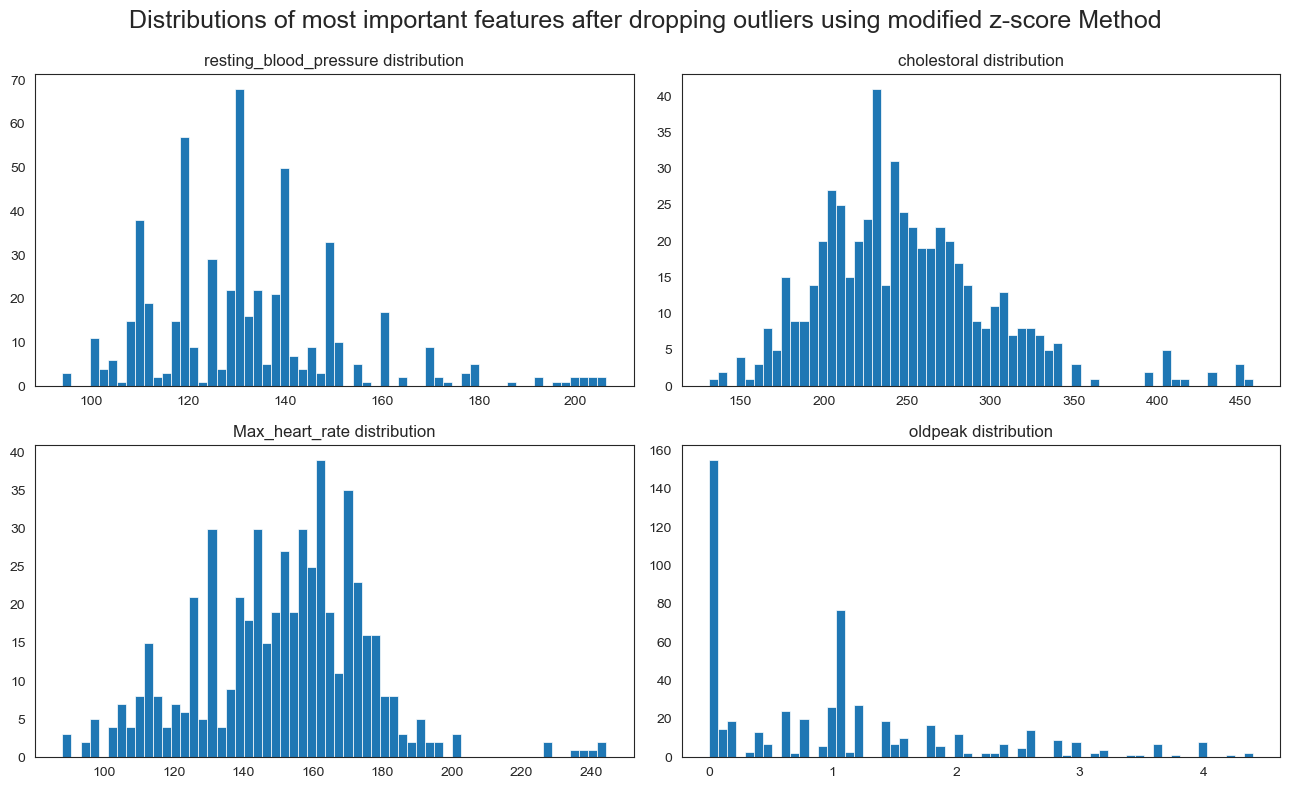

In [317]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 8))
fig.suptitle('Distributions of most important features after dropping outliers using modified z-score Method\n', size = 18)

axes[0,0].hist(df_out4['resting_blood_pressure'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,00].set_title("resting_blood_pressure distribution")

axes[0,1].hist(df_out4['cholestoral'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("cholestoral distribution")

axes[1,0].hist(df_out4['Max_heart_rate'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("Max_heart_rate distribution")

axes[1,1].hist(df_out4['oldpeak'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("oldpeak distribution")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## 4. Duplication

In [318]:
data.loc[data.duplicated()]

age  sex  chest_pain_type  resting_blood_pressure  cholestoral  \
118   29.0    1                1                   130.0        204.0   
134   54.0    1                1                   108.0        309.0   
211   67.0    1                3                   100.0        299.0   
219   54.0    1                3                   122.0        286.0   
235   64.0    1                0                   170.0        227.0   
...    ...  ...              ...                     ...          ...   
998   42.0    1                3                   136.0        315.0   
1002  66.0    1                3                   112.0        212.0   
1006  58.0    1                2                   140.0        211.0   
1018  41.0    1                3                   110.0        172.0   
1024  54.0    1                3                   120.0        188.0   

      rest_ecg  Max_heart_rate  exercise_induced_angina  oldpeak  slope  ...  \
118          1           202.0                        0  0.00000      0  ...   
134          2           156.0                        0  0.00000      0  ...   
211          1           125.0                        1  0.90000      1  ...   
219          1           116.0                        1  3.20000      1  ...   
235          2           155.0                        0  0.60000      1  ...   
...        ...             ...                      ...      ...    ...  ...   
998          2           125.0                        1  1.80000      1  ...   
1002         1           132.0                        1  0.10000      0  ...   
1006         1           165.0                        0  1.06992      0  ...   
1018         1           158.0                        0  0.00000      0  ...   
1024         2           113.0                        0  1.40000      1  ...   

      log_cholestoral  log_resting_blood_pressure  log_Max_heart_rate  \
118          5.323010                    4.875197            5.313206   
134          5.736572                    4.691348            5.056246   
211          5.703782                    4.615121            4.836282   
219          5.659482                    4.812184            4.762174   
235          5.429346                    5.141664            5.049856   
...               ...                         ...                 ...   
998          5.755742                    4.919981            4.836282   
1002         5.361292                    4.727388            4.890349   
1006         5.356586                    4.948760            5.111988   
1018         5.153292                    4.709530            5.068904   
1024         5.241747                    4.795791            4.736198   

      vessels_colored_by_flourosopy_Four  vessels_colored_by_flourosopy_One  \
118                                  0.0                                0.0   
134                                  0.0                                0.0   
211                                  0.0                                0.0   
219                                  0.0                                0.0   
235                                  0.0                                0.0   
...                                  ...                                ...   
998                                  0.0                                0.0   
1002                                 0.0                                1.0   
1006                                 0.0                                0.0   
1018                                 0.0                                0.0   
1024                                 0.0                                1.0   

      vessels_colored_by_flourosopy_Three  vessels_colored_by_flourosopy_Two  \
118                                   0.0                                0.0   
134                                   0.0                                0.0   
211                                   0.0                                1.0   
219                    

In [319]:
duplicates = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")
duplicates.head()

Number of duplicate rows: 114


age  sex  chest_pain_type  resting_blood_pressure  cholestoral  \
118  29.0    1                1                   130.0        204.0   
134  54.0    1                1                   108.0        309.0   
211  67.0    1                3                   100.0        299.0   
219  54.0    1                3                   122.0        286.0   
235  64.0    1                0                   170.0        227.0   

     rest_ecg  Max_heart_rate  exercise_induced_angina  oldpeak  slope  ...  \
118         1           202.0                        0      0.0      0  ...   
134         2           156.0                        0      0.0      0  ...   
211         1           125.0                        1      0.9      1  ...   
219         1           116.0                        1      3.2      1  ...   
235         2           155.0                        0      0.6      1  ...   

     log_cholestoral  log_resting_blood_pressure  log_Max_heart_rate  \
118         5.323010                    4.875197            5.313206   
134         5.736572                    4.691348            5.056246   
211         5.703782                    4.615121            4.836282   
219         5.659482                    4.812184            4.762174   
235         5.429346                    5.141664            5.049856   

     vessels_colored_by_flourosopy_Four  vessels_colored_by_flourosopy_One  \
118                                 0.0                                0.0   
134                                 0.0                                0.0   
211                                 0.0                                0.0   
219                                 0.0                                0.0   
235                                 0.0                                0.0   

     vessels_colored_by_flourosopy_Three  vessels_colored_by_flourosopy_Two  \
118                                  0.0                                0.0   
134                                  0.0                                0.0   
211                                  0.0                                1.0   
219                                  0.0                                1.0   
235                                  0.0                                0.0   

     vessels_colored_by_flourosopy_Zero  \
118                                 1.0   
134                                 1.0   
211                                 0.0   
219                                 0.0   
235                                 1.0   

     fasting_blood_sugar_Greater than 120 mg/ml  \
118                                         0.0   
134                                         0.0   
211                                         0.0   
219                                         0.0   
235                                         0.0   

     fasting_blood_sugar_Lower than 120 mg/ml  
118                                       1.0  
134                                       1.0  
211                                       1.0  
219                                       1.0  
235                                       1.0  

[5 rows x 23 columns]

In [320]:
data = data.drop_duplicates()

In [321]:
duplicates = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")
duplicates.head()

Number of duplicate rows: 0


Empty DataFrame
Columns: [age, sex, chest_pain_type, resting_blood_pressure, cholestoral, rest_ecg, Max_heart_rate, exercise_induced_angina, oldpeak, slope, thalassemia, target, log_oldpeak, log_cholestoral, log_resting_blood_pressure, log_Max_heart_rate, vessels_colored_by_flourosopy_Four, vessels_colored_by_flourosopy_One, vessels_colored_by_flourosopy_Three, vessels_colored_by_flourosopy_Two, vessels_colored_by_flourosopy_Zero, fasting_blood_sugar_Greater than 120 mg/ml, fasting_blood_sugar_Lower than 120 mg/ml]
Index: []

[0 rows x 23 columns]

## Visualization

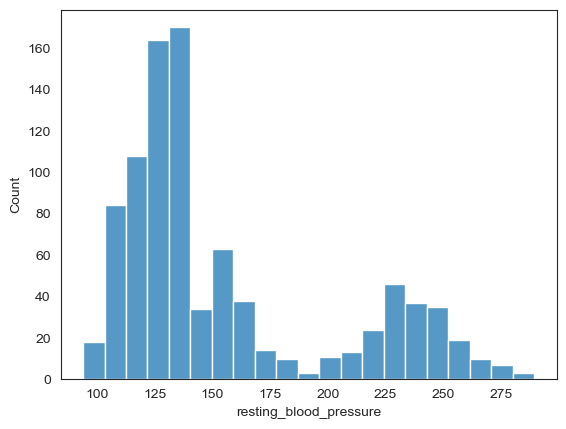

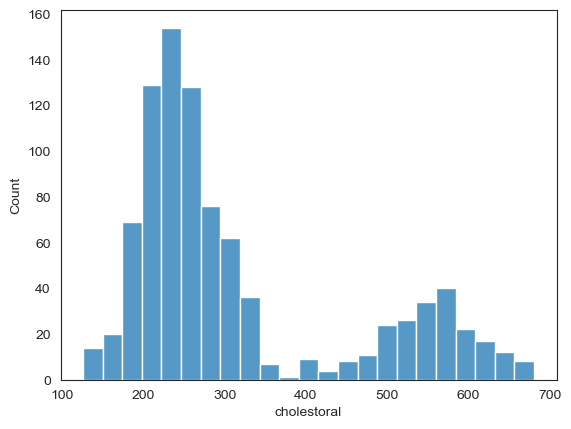

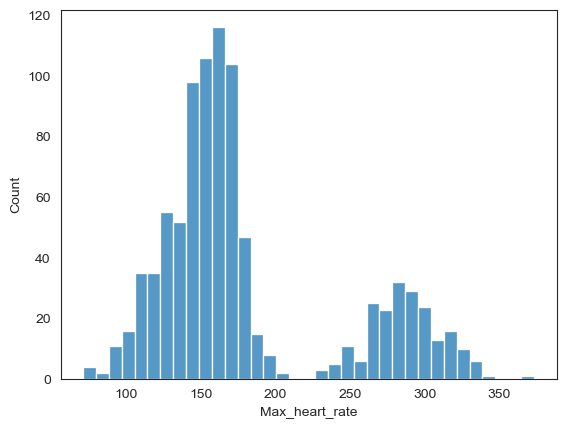

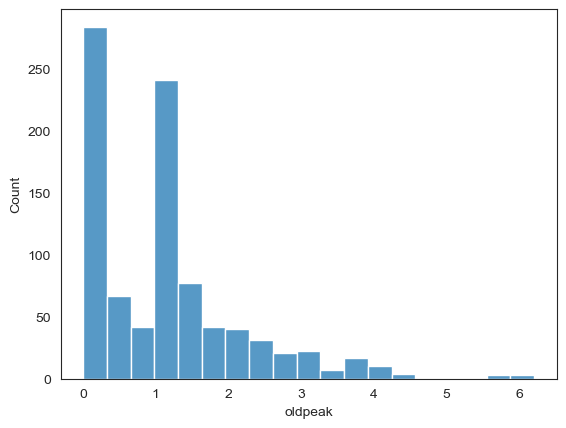

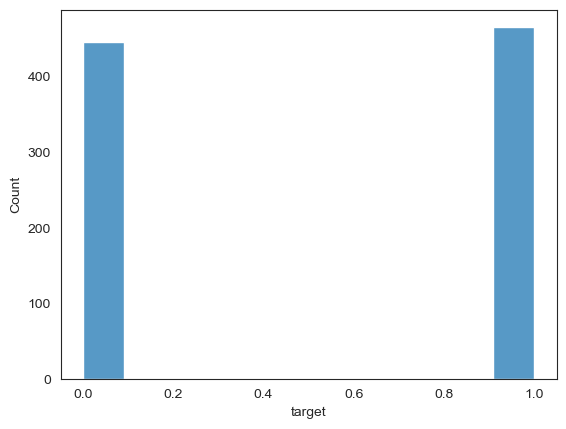

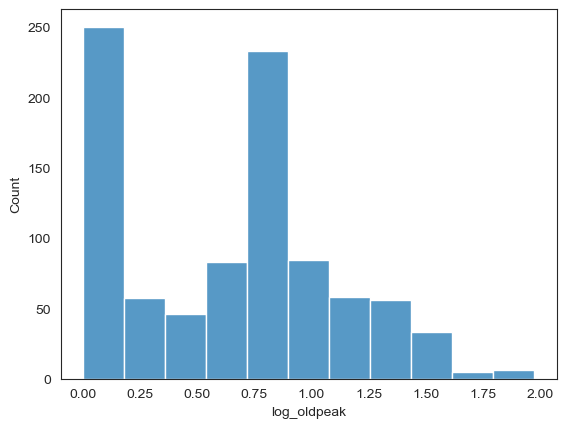

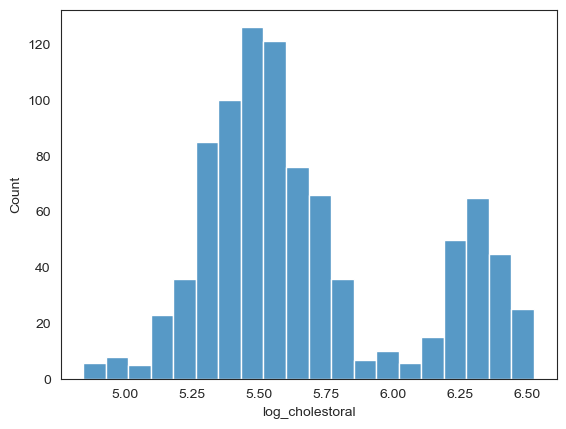

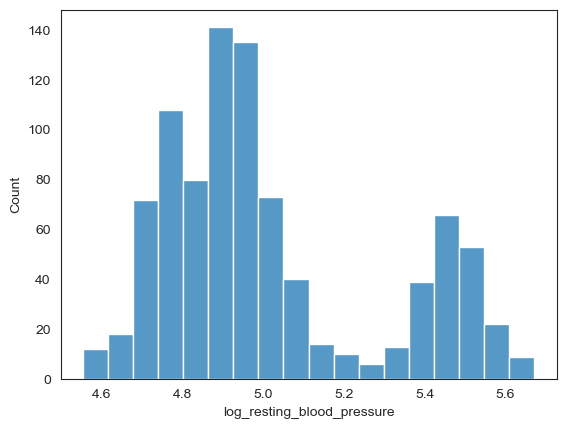

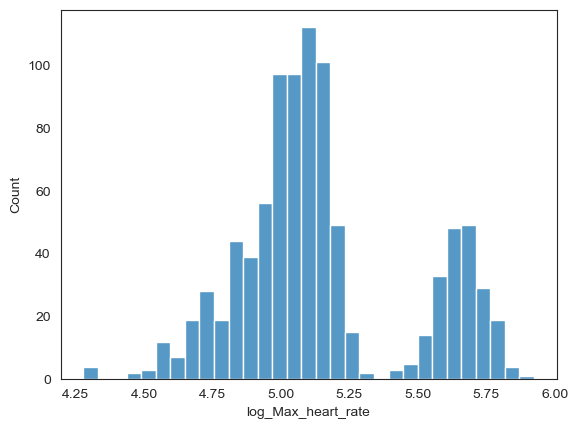

In [322]:
for i in data_viz.select_dtypes(include='number').columns:
    sns.histplot(data=data,x=i)
    plt.show()

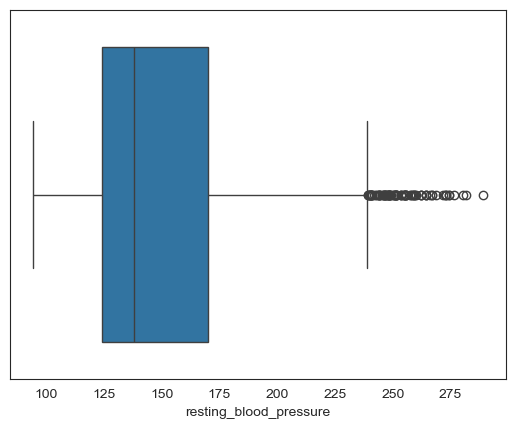

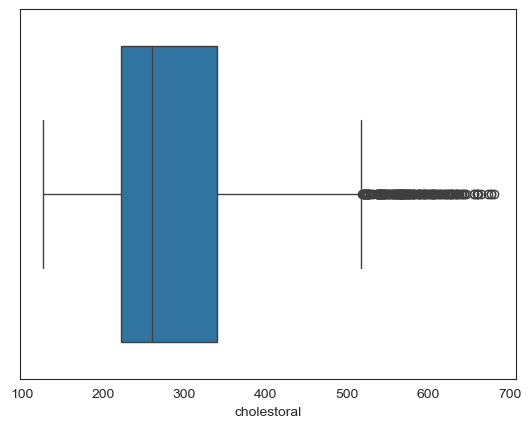

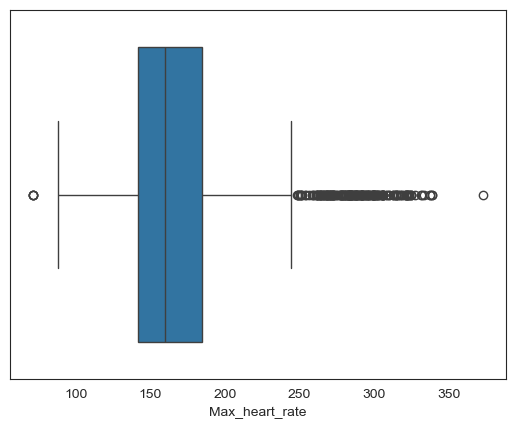

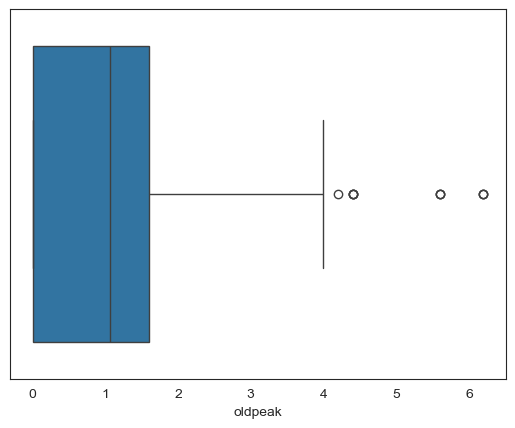

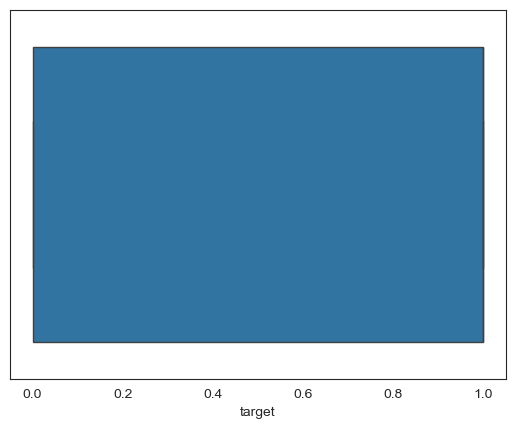

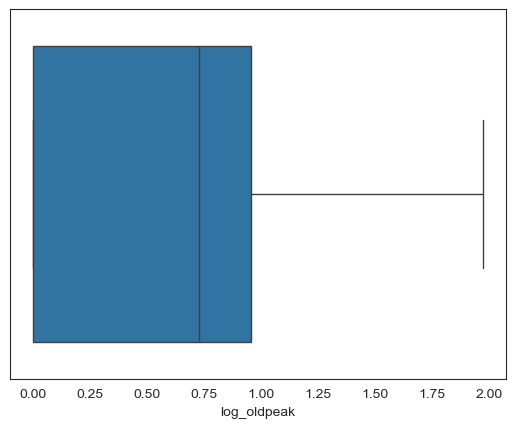

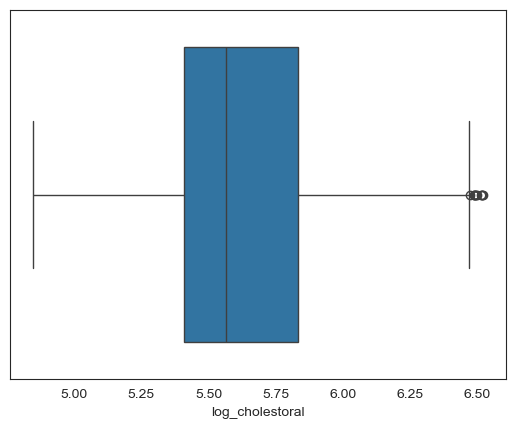

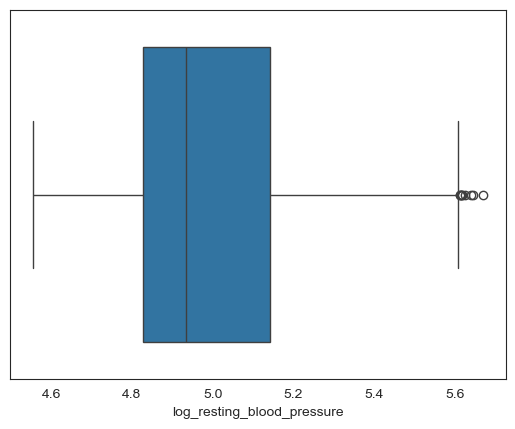

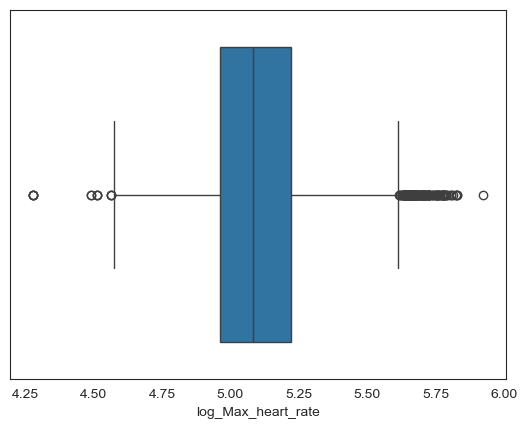

In [323]:
#box blot for knowing the outliers in the data 

for i in data_viz.select_dtypes(include='number').columns:
    sns.boxplot(data=data,x=i)
    plt.show()

In [324]:
data_viz.select_dtypes(include='number').columns

Index(['resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak',
       'target', 'log_oldpeak', 'log_cholestoral',
       'log_resting_blood_pressure', 'log_Max_heart_rate'],
      dtype='object')

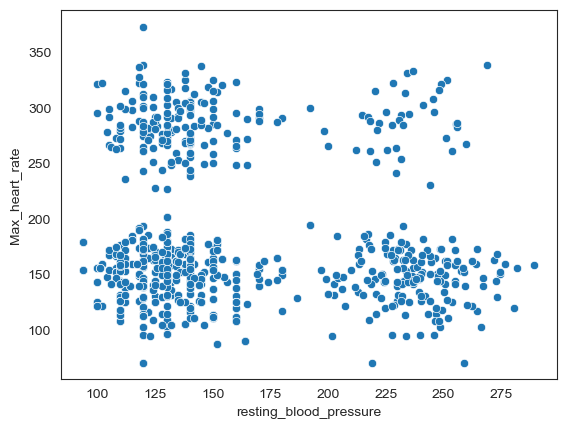

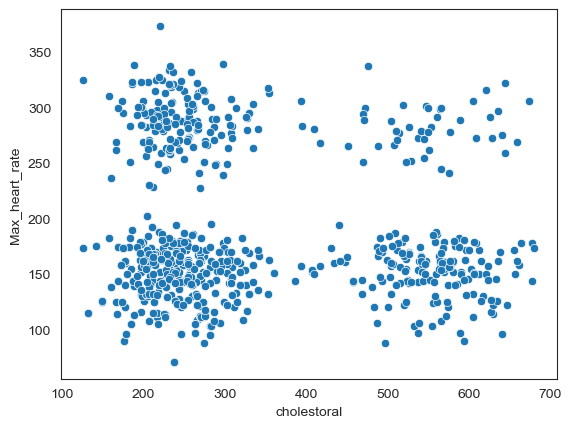

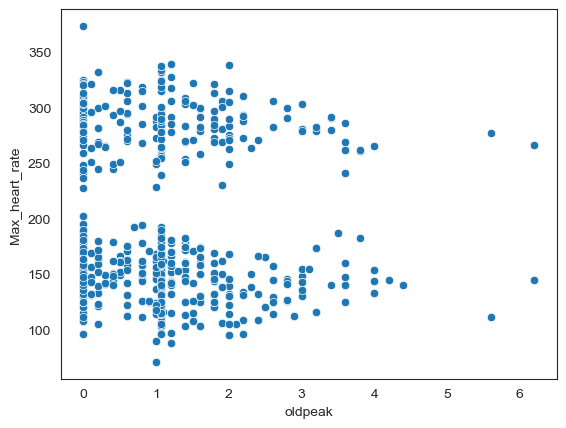

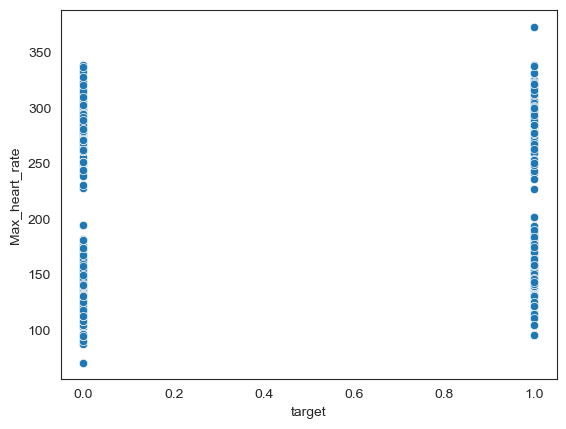

In [325]:
#scatter plot
for i in ['resting_blood_pressure', 'cholestoral', 'oldpeak',
       'target']:
        sns.scatterplot(data=data_viz,x=i,y='Max_heart_rate')
        plt.show()

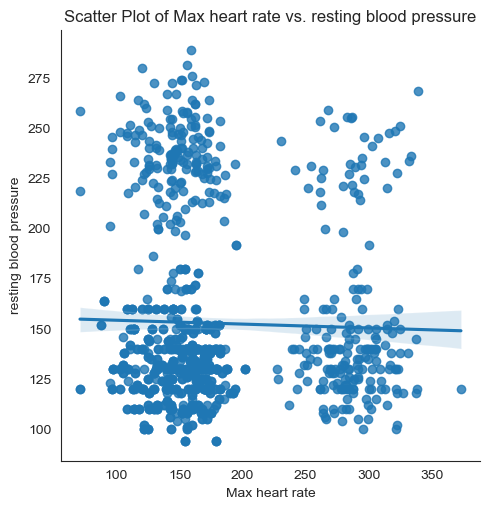

In [326]:
# Create a scatter plot with a linear fit
sns.lmplot(x='Max_heart_rate', y='resting_blood_pressure', data=data_viz)
plt.xlabel('Max heart rate')
plt.ylabel('resting blood pressure')
plt.title('Scatter Plot of Max heart rate vs. resting blood pressure')
plt.show()


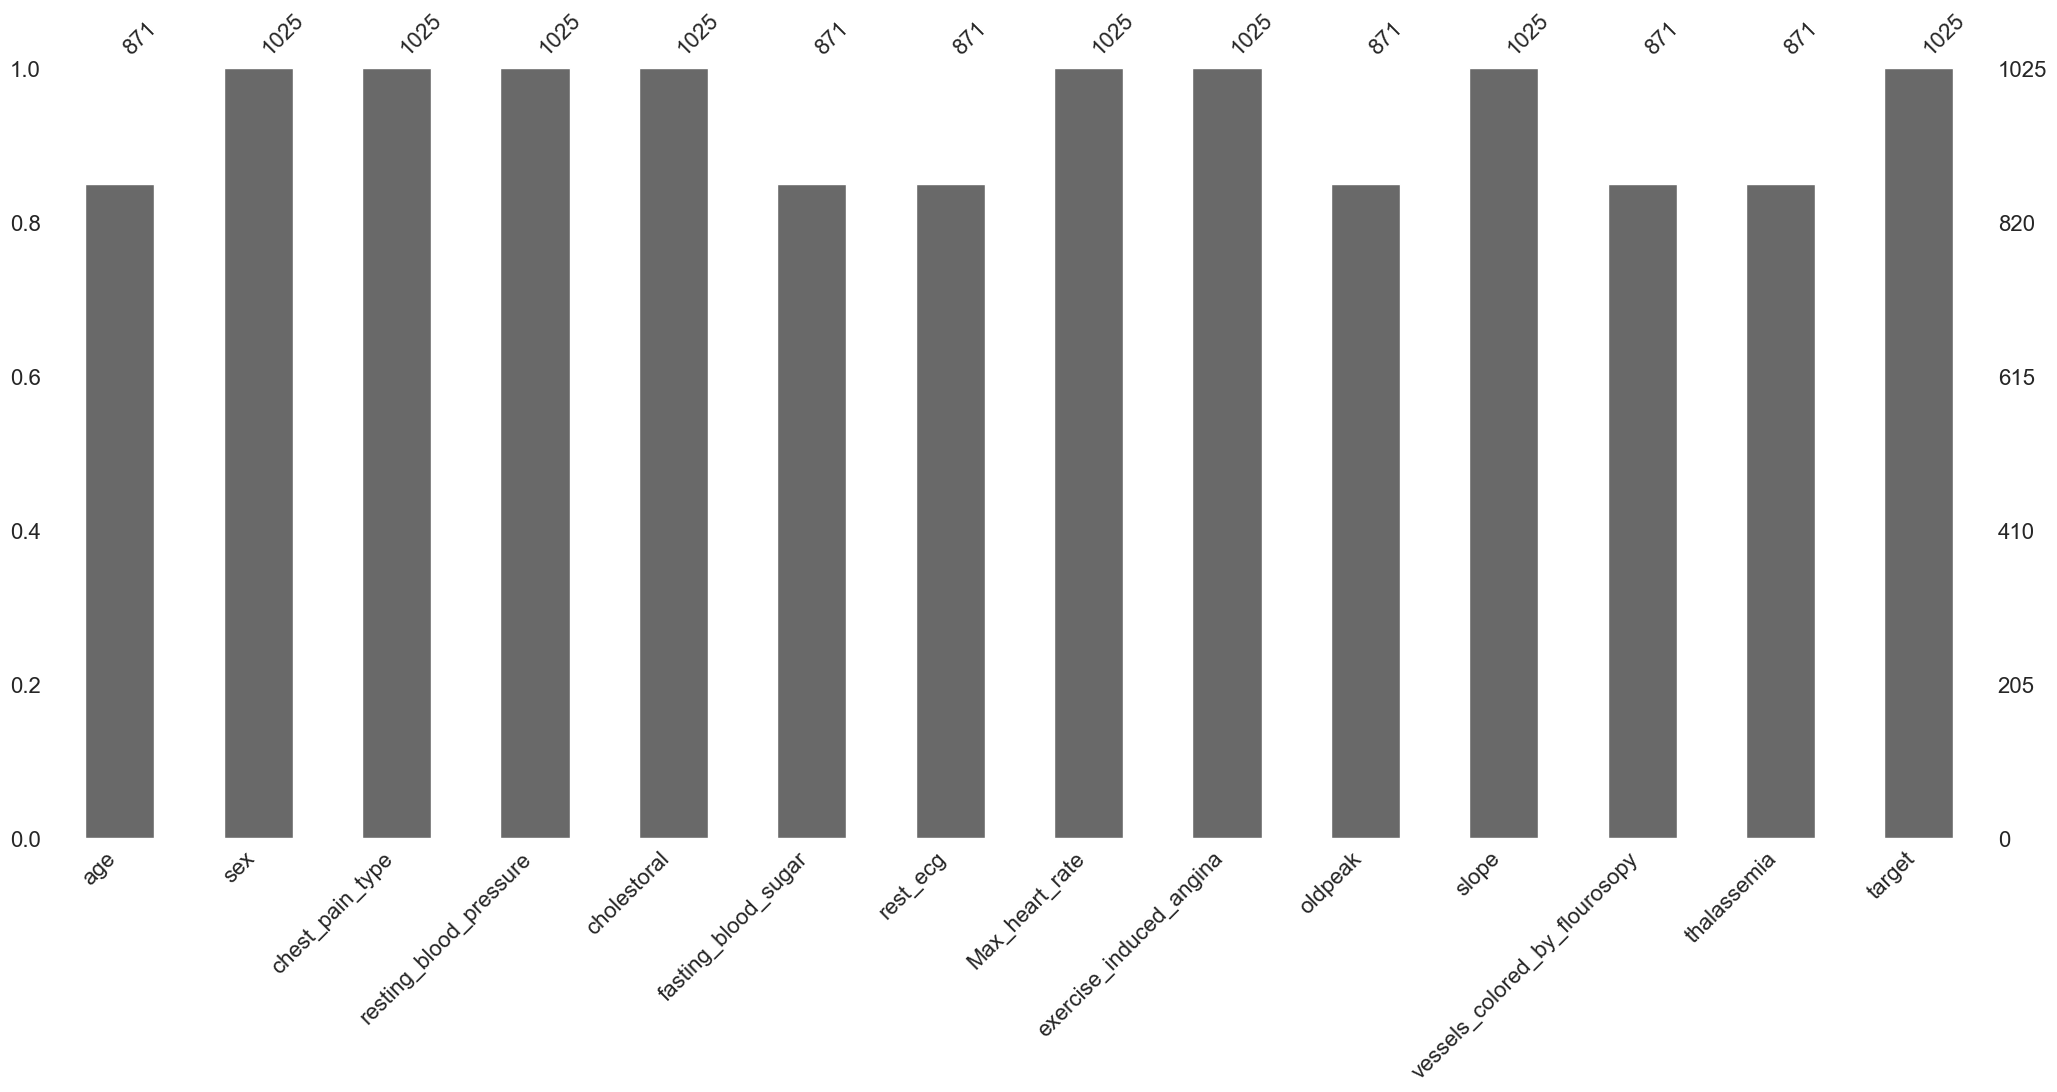

In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
msno.bar(data0)
plt.show()

In [328]:
top=data_viz["sex"].value_counts()[0:5]
top

sex
Male      713
Female    312
Name: count, dtype: int64

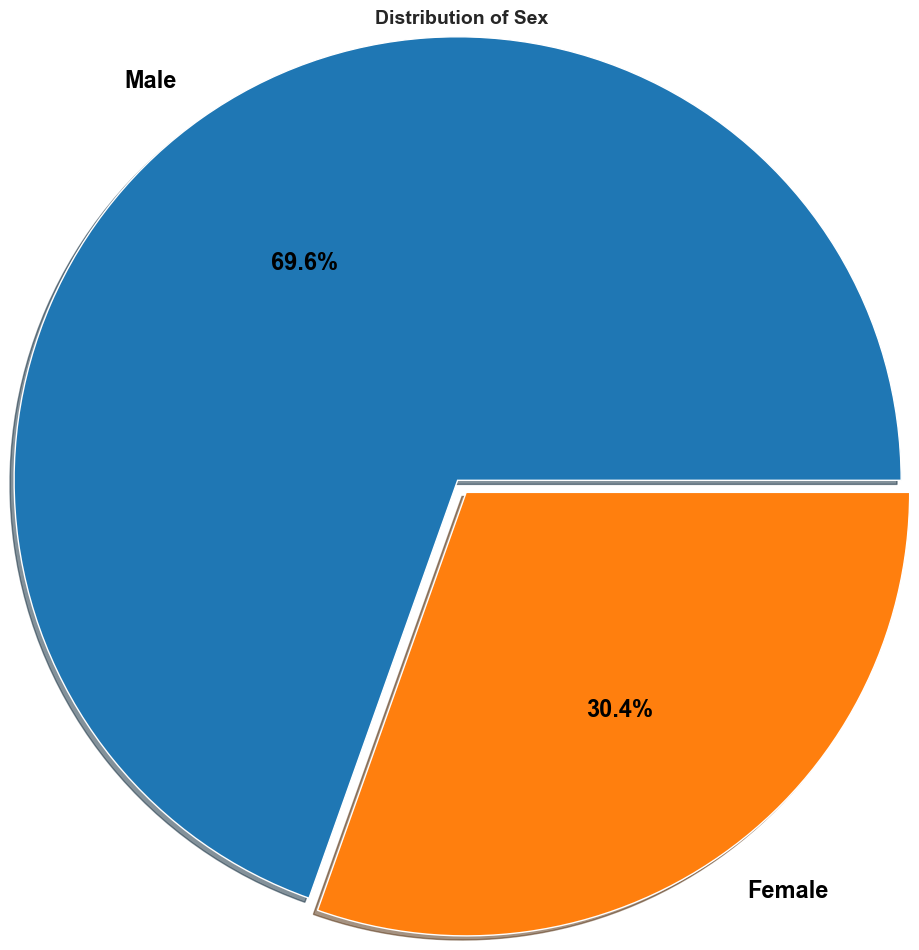

In [329]:
plt.pie(top,labels = data_viz['sex'].unique()[0:2]
        ,autopct='%1.1f%%',radius=3,
        explode = (0.05,0.05),shadow=True
        ,textprops={'color':'black','weight':'bold','fontsize':17})
plt.title("Distribution of Sex", fontsize=14, weight='bold', pad=200)
plt.show()

In [330]:
data_viz["age"].value_counts()

age
58.0    205
57.0     49
54.0     48
52.0     39
59.0     37
56.0     35
62.0     33
51.0     33
41.0     31
63.0     31
44.0     29
60.0     29
64.0     27
61.0     25
55.0     25
45.0     24
67.0     24
42.0     23
65.0     23
66.0     22
43.0     22
53.0     21
48.0     20
46.0     19
50.0     17
49.0     16
47.0     15
68.0     12
38.0     12
70.0     12
39.0     11
35.0     10
71.0     10
40.0      9
69.0      7
34.0      4
37.0      4
76.0      3
77.0      3
29.0      3
74.0      3
Name: count, dtype: int64

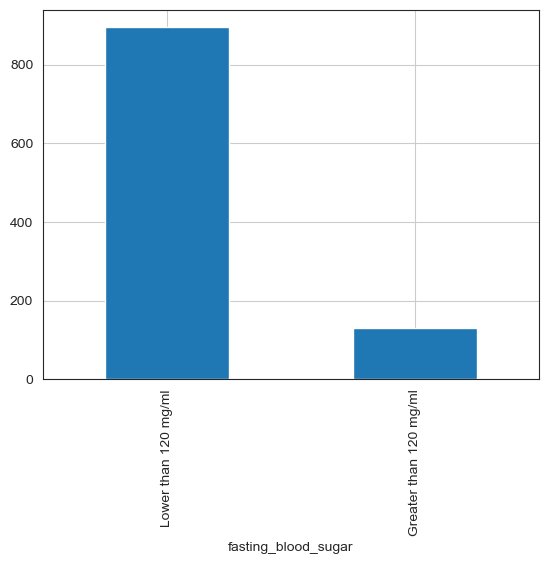

In [331]:
data_viz["fasting_blood_sugar"].value_counts().plot(kind="bar")
plt.grid(True)

Text(0, 0.5, 'sex ( Rs )')

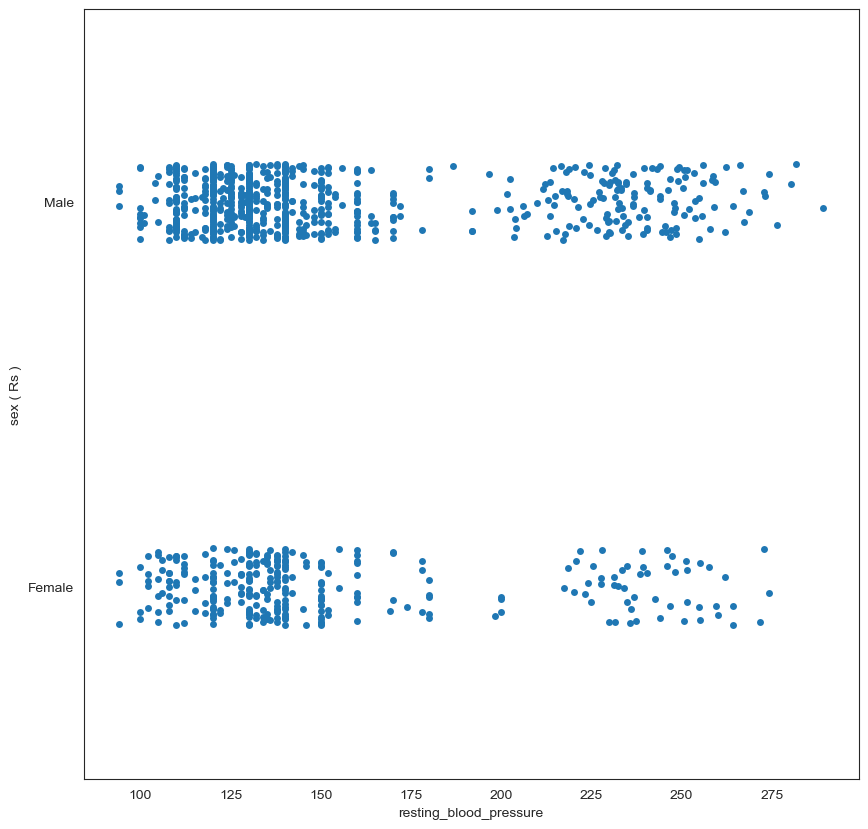

In [332]:
plt.figure(figsize=(10,10))
ax = sns.stripplot(x="resting_blood_pressure", y="sex", data=data_viz)
plt.ylabel("sex ( Rs )")

In [333]:
data_viz['Max_heart_rate'].groupby(data['Max_heart_rate']).count().sort_values(ascending=False).iloc[:10]

Max_heart_rate
162.0    25
173.0    22
144.0    21
163.0    20
160.0    18
152.0    18
150.0    18
143.0    18
140.0    17
172.0    17
Name: Max_heart_rate, dtype: int64

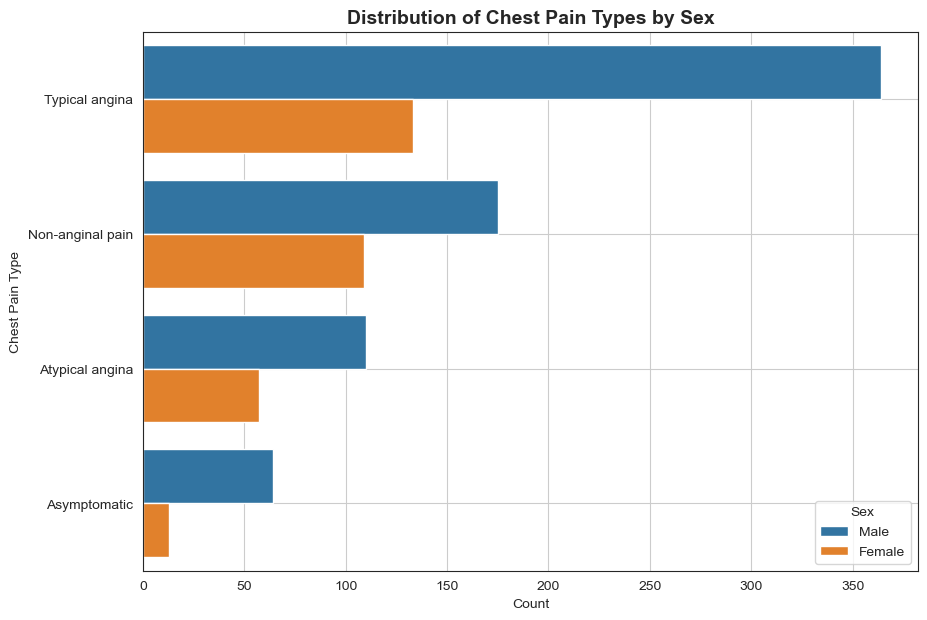

In [334]:
plt.figure(figsize=(10,7))
sns.countplot(
    y="chest_pain_type", 
    hue="sex", 
    data=data_viz,
    order=data_viz["chest_pain_type"].value_counts().index
)
plt.grid(True)
plt.title("Distribution of Chest Pain Types by Sex", fontsize=14, weight='bold')
plt.xlabel("Count")
plt.ylabel("Chest Pain Type")
plt.legend(title="Sex")
plt.show()

<Axes: xlabel='count', ylabel='fasting_blood_sugar'>

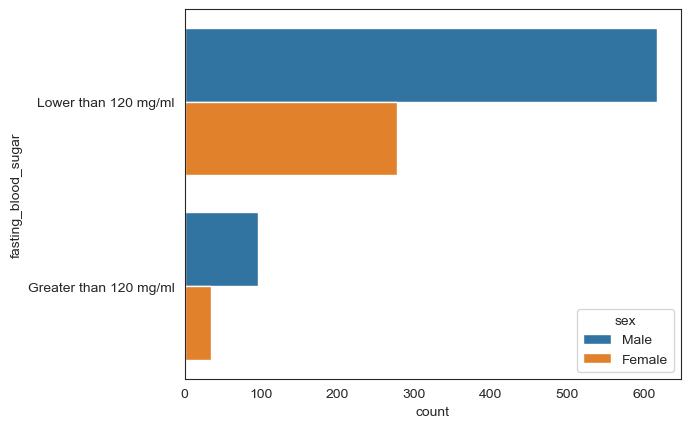

In [335]:
sns.countplot(y="fasting_blood_sugar", hue="sex", data=data_viz, 
           order=data_viz["fasting_blood_sugar"].value_counts().iloc[:5].index)

In [336]:
df=data_viz.drop("target",axis="columns")


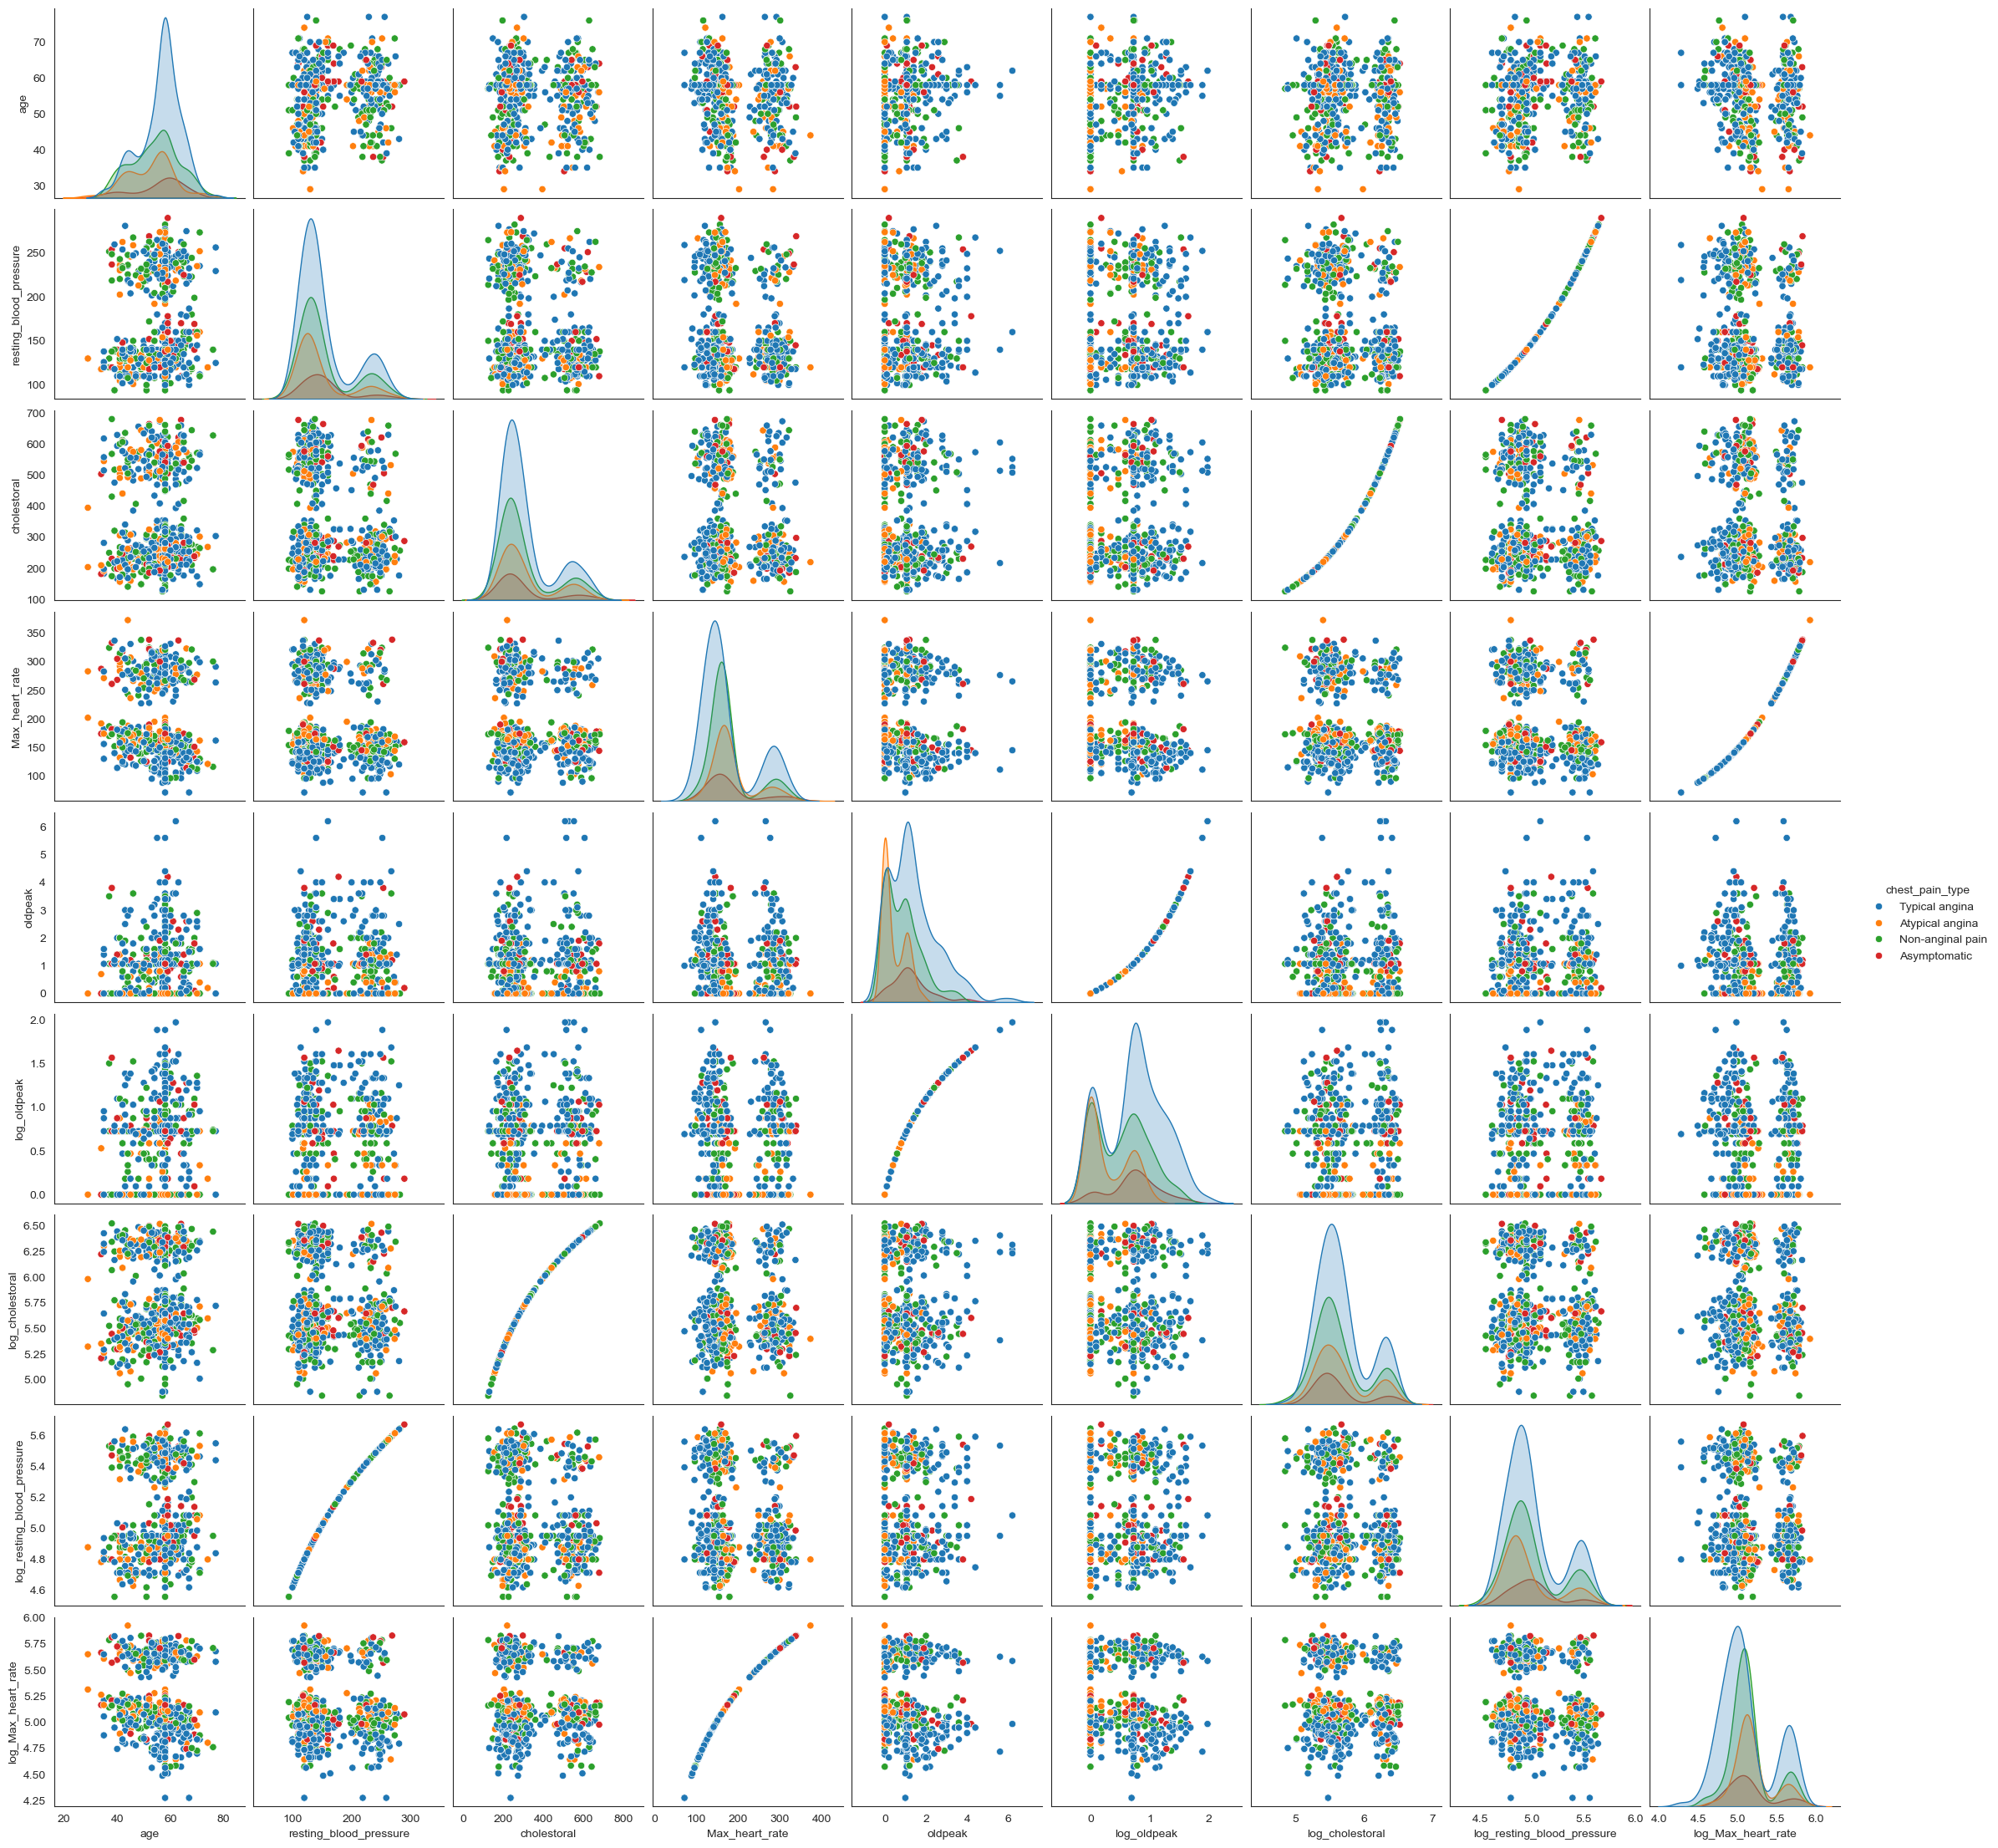

In [337]:
sns.set_style("white")
sns.pairplot(df, hue='chest_pain_type')

In [338]:
data0.head(5)

age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0  52.0    Male  Typical angina                   125.0   212.000000   
1   NaN    Male  Typical angina                   140.0   203.000000   
2  70.0    Male  Typical angina                   145.0   174.000000   
3   NaN    Male  Typical angina                   148.0   448.084179   
4  62.0  Female  Typical angina                   138.0   487.020946   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality      228.034204   
1  Greater than 120 mg/ml                 Normal      256.195943   
2    Lower than 120 mg/ml  ST-T wave abnormality      305.677800   
3    Lower than 120 mg/ml                    NaN      161.000000   
4  Greater than 120 mg/ml  ST-T wave abnormality      106.000000   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1                     Yes      NaN    Upsloping                          Zero   
2                     Yes      2.6    Upsloping                          Zero   
3                      No      0.0  Downsloping                           One   
4                      No      1.9         Flat                         Three   

         thalassemia  target  
0  Reversable Defect       0  
1  Reversable Defect       0  
2  Reversable Defect       0  
3  Reversable Defect       0  
4       Fixed Defect       0

In [339]:
### grouping columns 
cat_features = data0.select_dtypes(include = 'object').columns
num_features = data0.select_dtypes(include = ['int', 'float']).columns

In [340]:
cat_features

Index(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
       'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy',
       'thalassemia'],
      dtype='object')

In [341]:
num_features

Index(['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate',
       'oldpeak', 'target'],
      dtype='object')

In [342]:
for i in cat_features:
    print(df[i].value_counts())
    print("\n"+"-"*50)

sex
Male      713
Female    312
Name: count, dtype: int64

--------------------------------------------------
chest_pain_type
Typical angina      497
Non-anginal pain    284
Atypical angina     167
Asymptomatic         77
Name: count, dtype: int64

--------------------------------------------------
fasting_blood_sugar
Lower than 120 mg/ml      895
Greater than 120 mg/ml    130
Name: count, dtype: int64

--------------------------------------------------
rest_ecg
ST-T wave abnormality           590
Normal                          423
Left ventricular hypertrophy     12
Name: count, dtype: int64

--------------------------------------------------
exercise_induced_angina
No     680
Yes    345
Name: count, dtype: int64

--------------------------------------------------
slope
Flat           482
Downsloping    469
Upsloping       74
Name: count, dtype: int64

--------------------------------------------------
vessels_colored_by_flourosopy
Zero     644
One      191
Two      117
Three     60


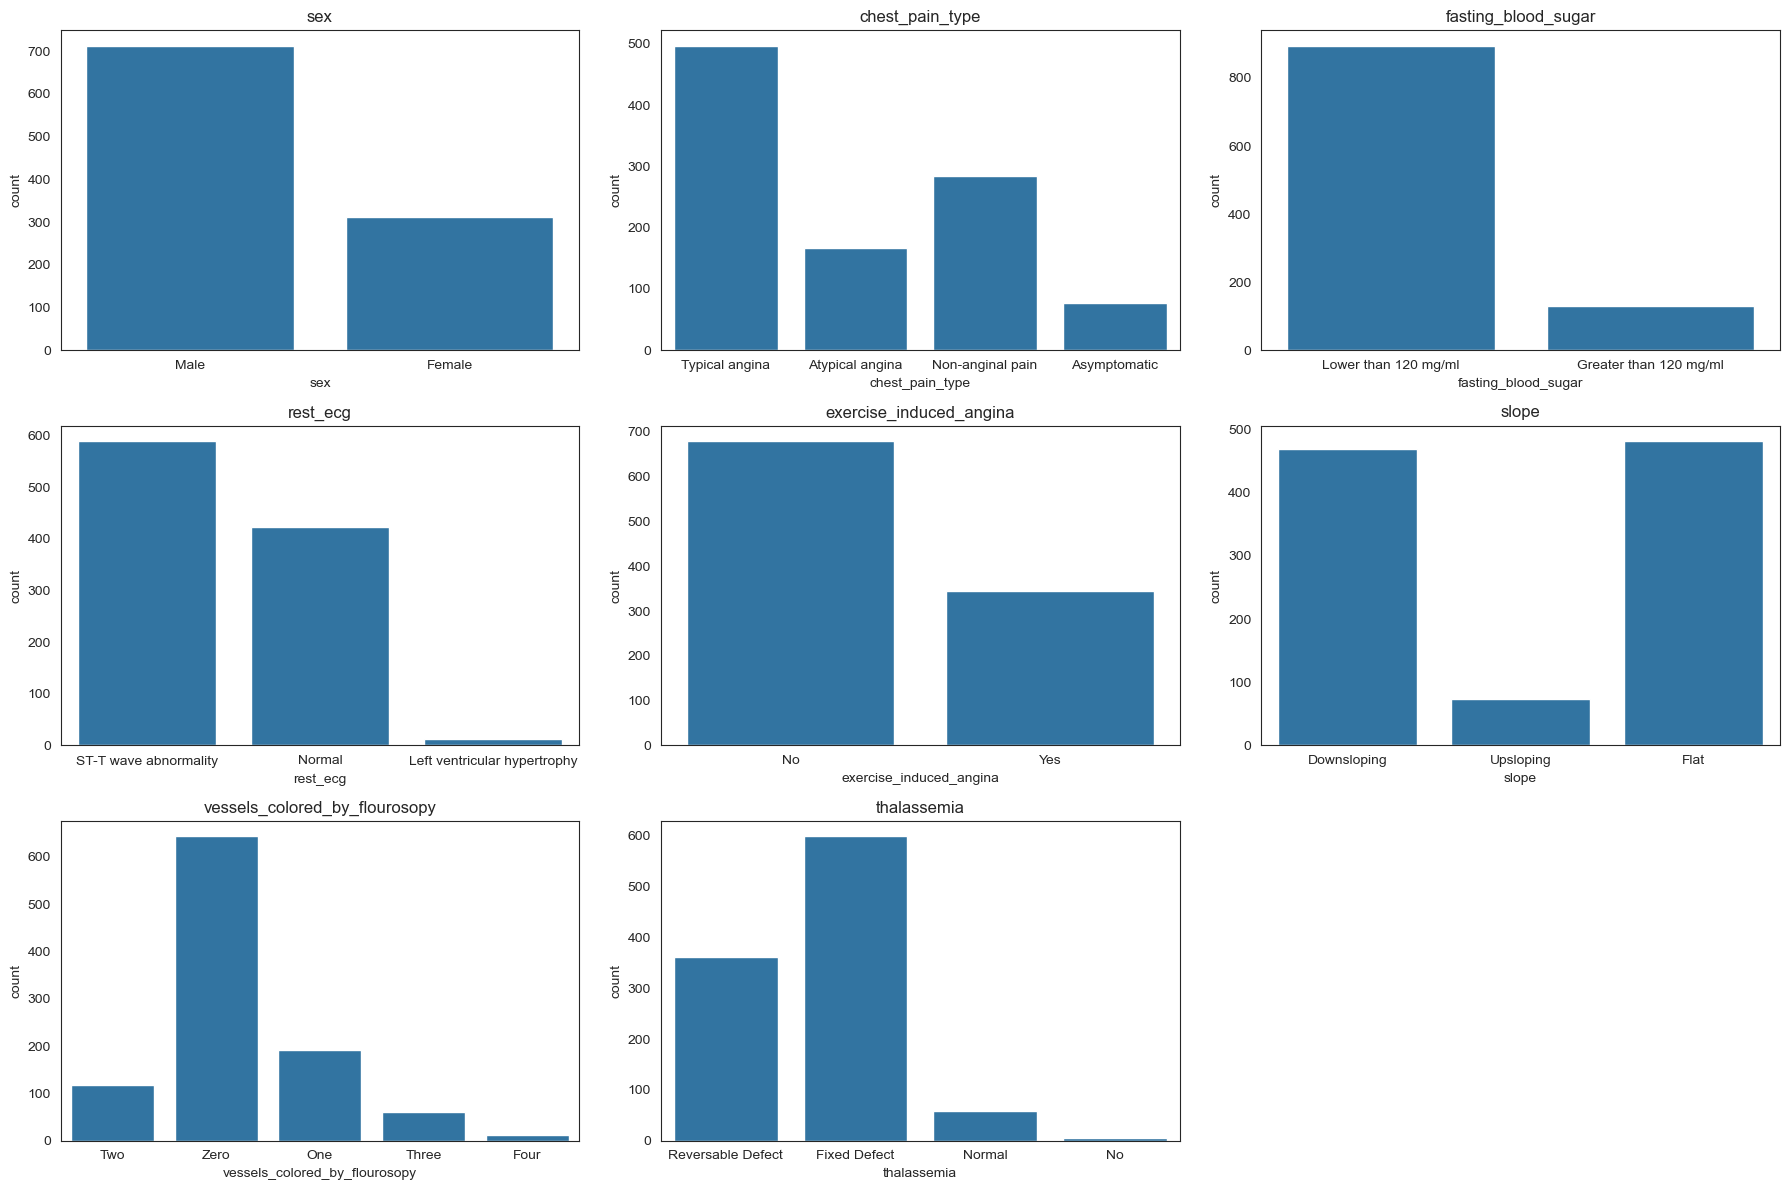

In [343]:

fig, ax = plt.subplots(nrows=int(np.ceil(len(cat_features) / 3)), ncols=3, figsize=(18, 12))  # تكبير الشكل
ax = ax.flatten()

for i, column in enumerate(cat_features):
    sns.countplot(data=df, x=df[column], ax=ax[i])
    ax[i].set_title(column, fontsize=12)
    ax[i].tick_params(axis='x')  

for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()  
plt.show()

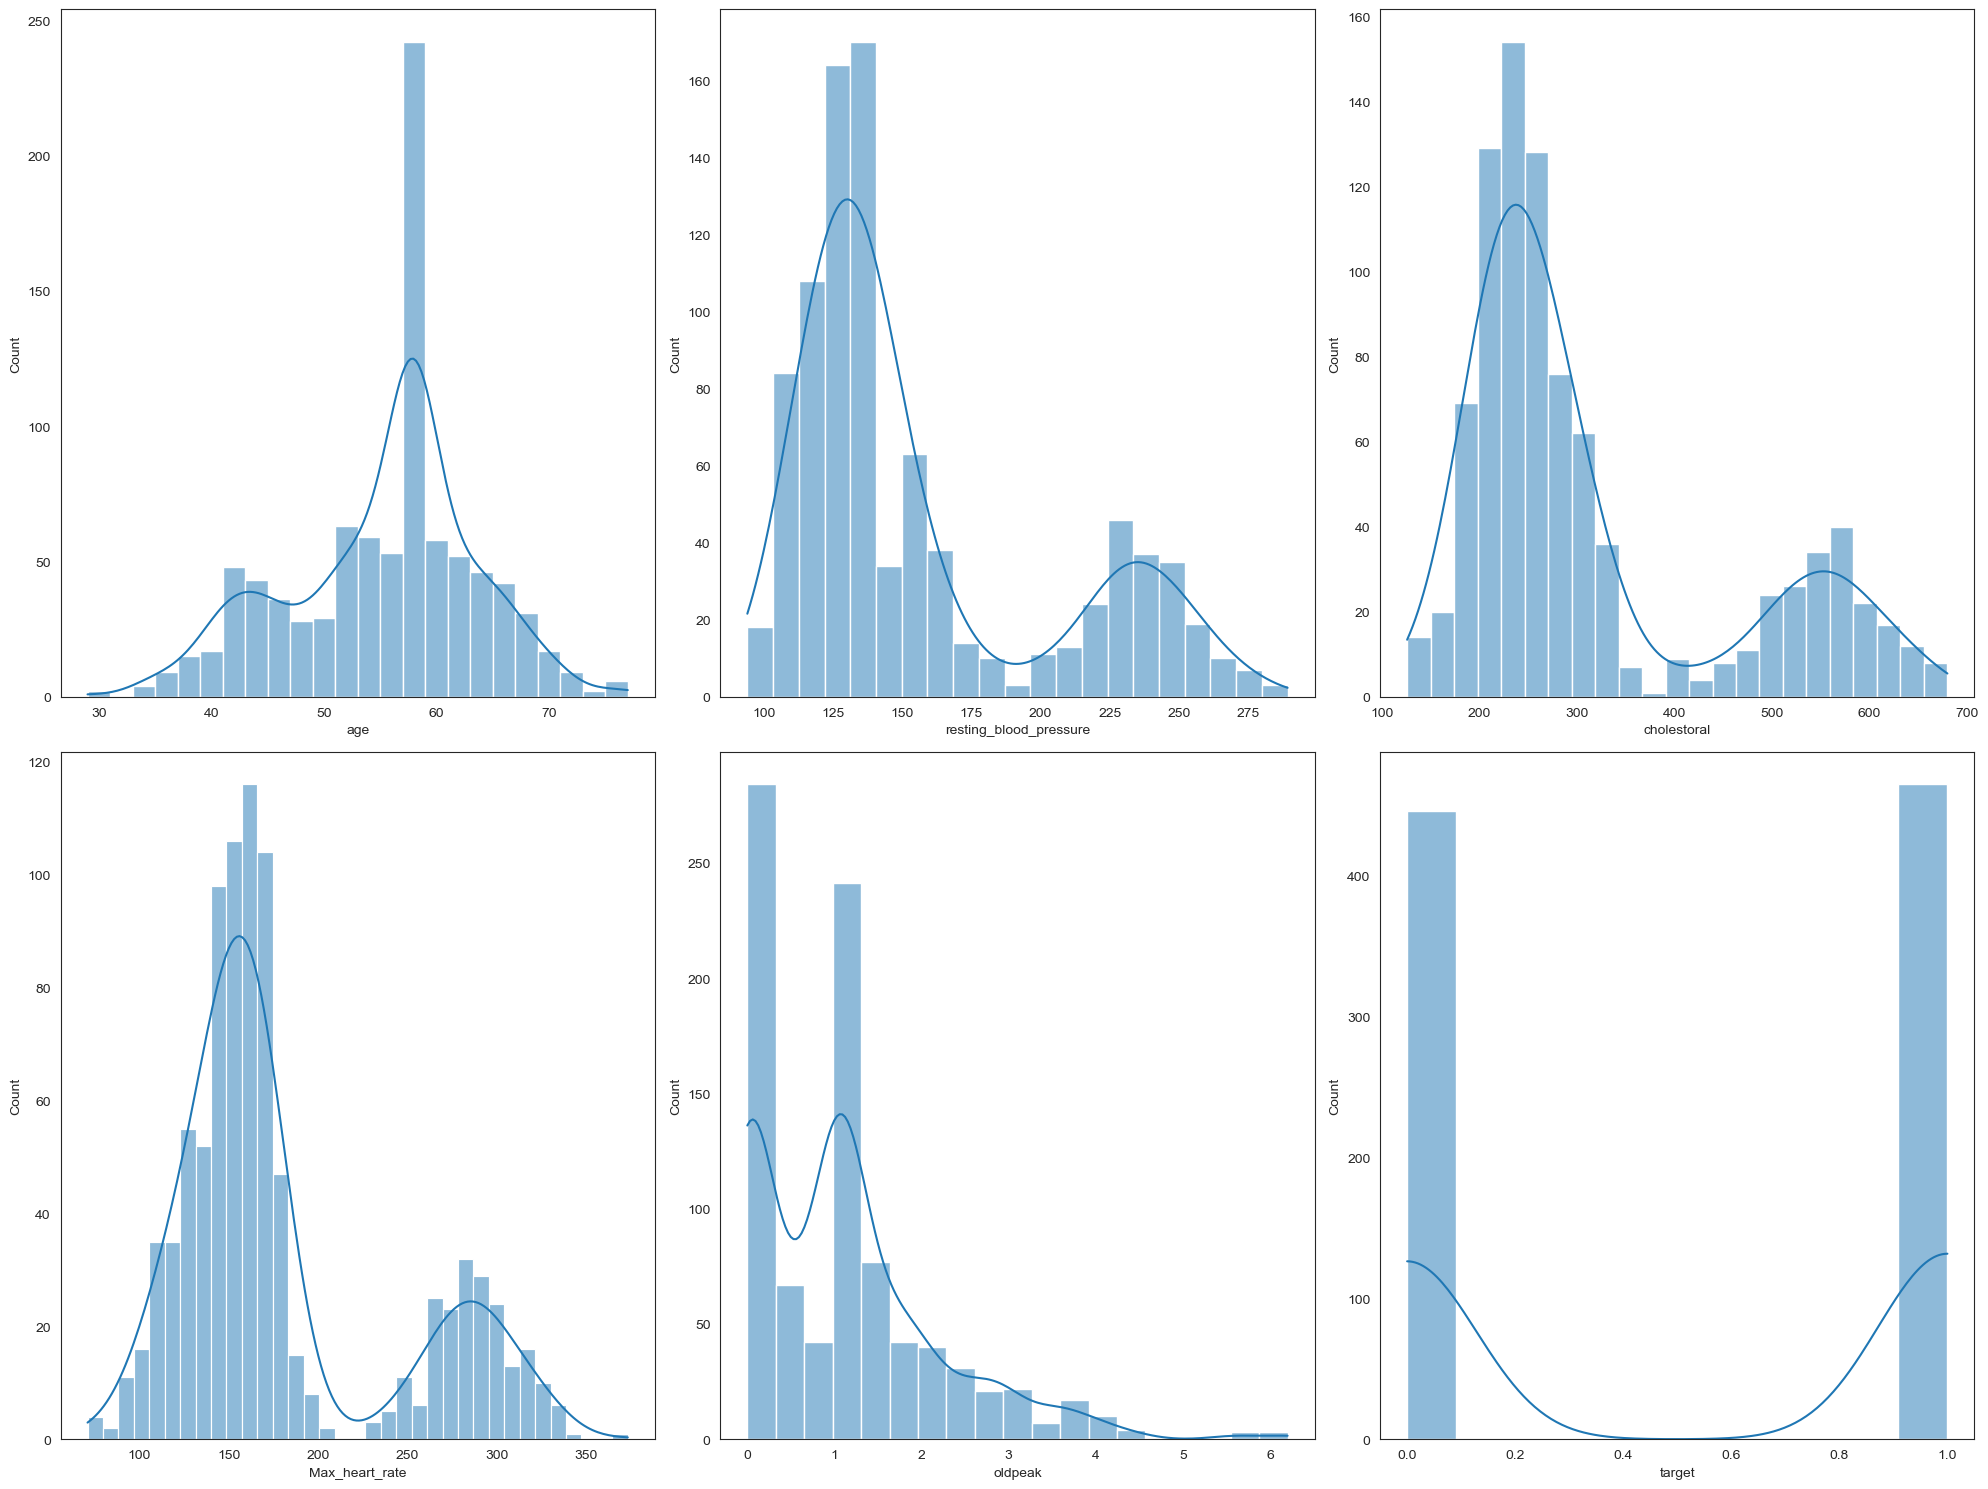

In [344]:
fig, axes = plt.subplots( nrows= 2, ncols=3, figsize = (20,15))
axes = axes.flatten()

for i , column in enumerate(num_features):
    ax = axes[i]
    sns.histplot(data[column], kde=True, ax=ax)

plt.tight_layout()
plt.show()

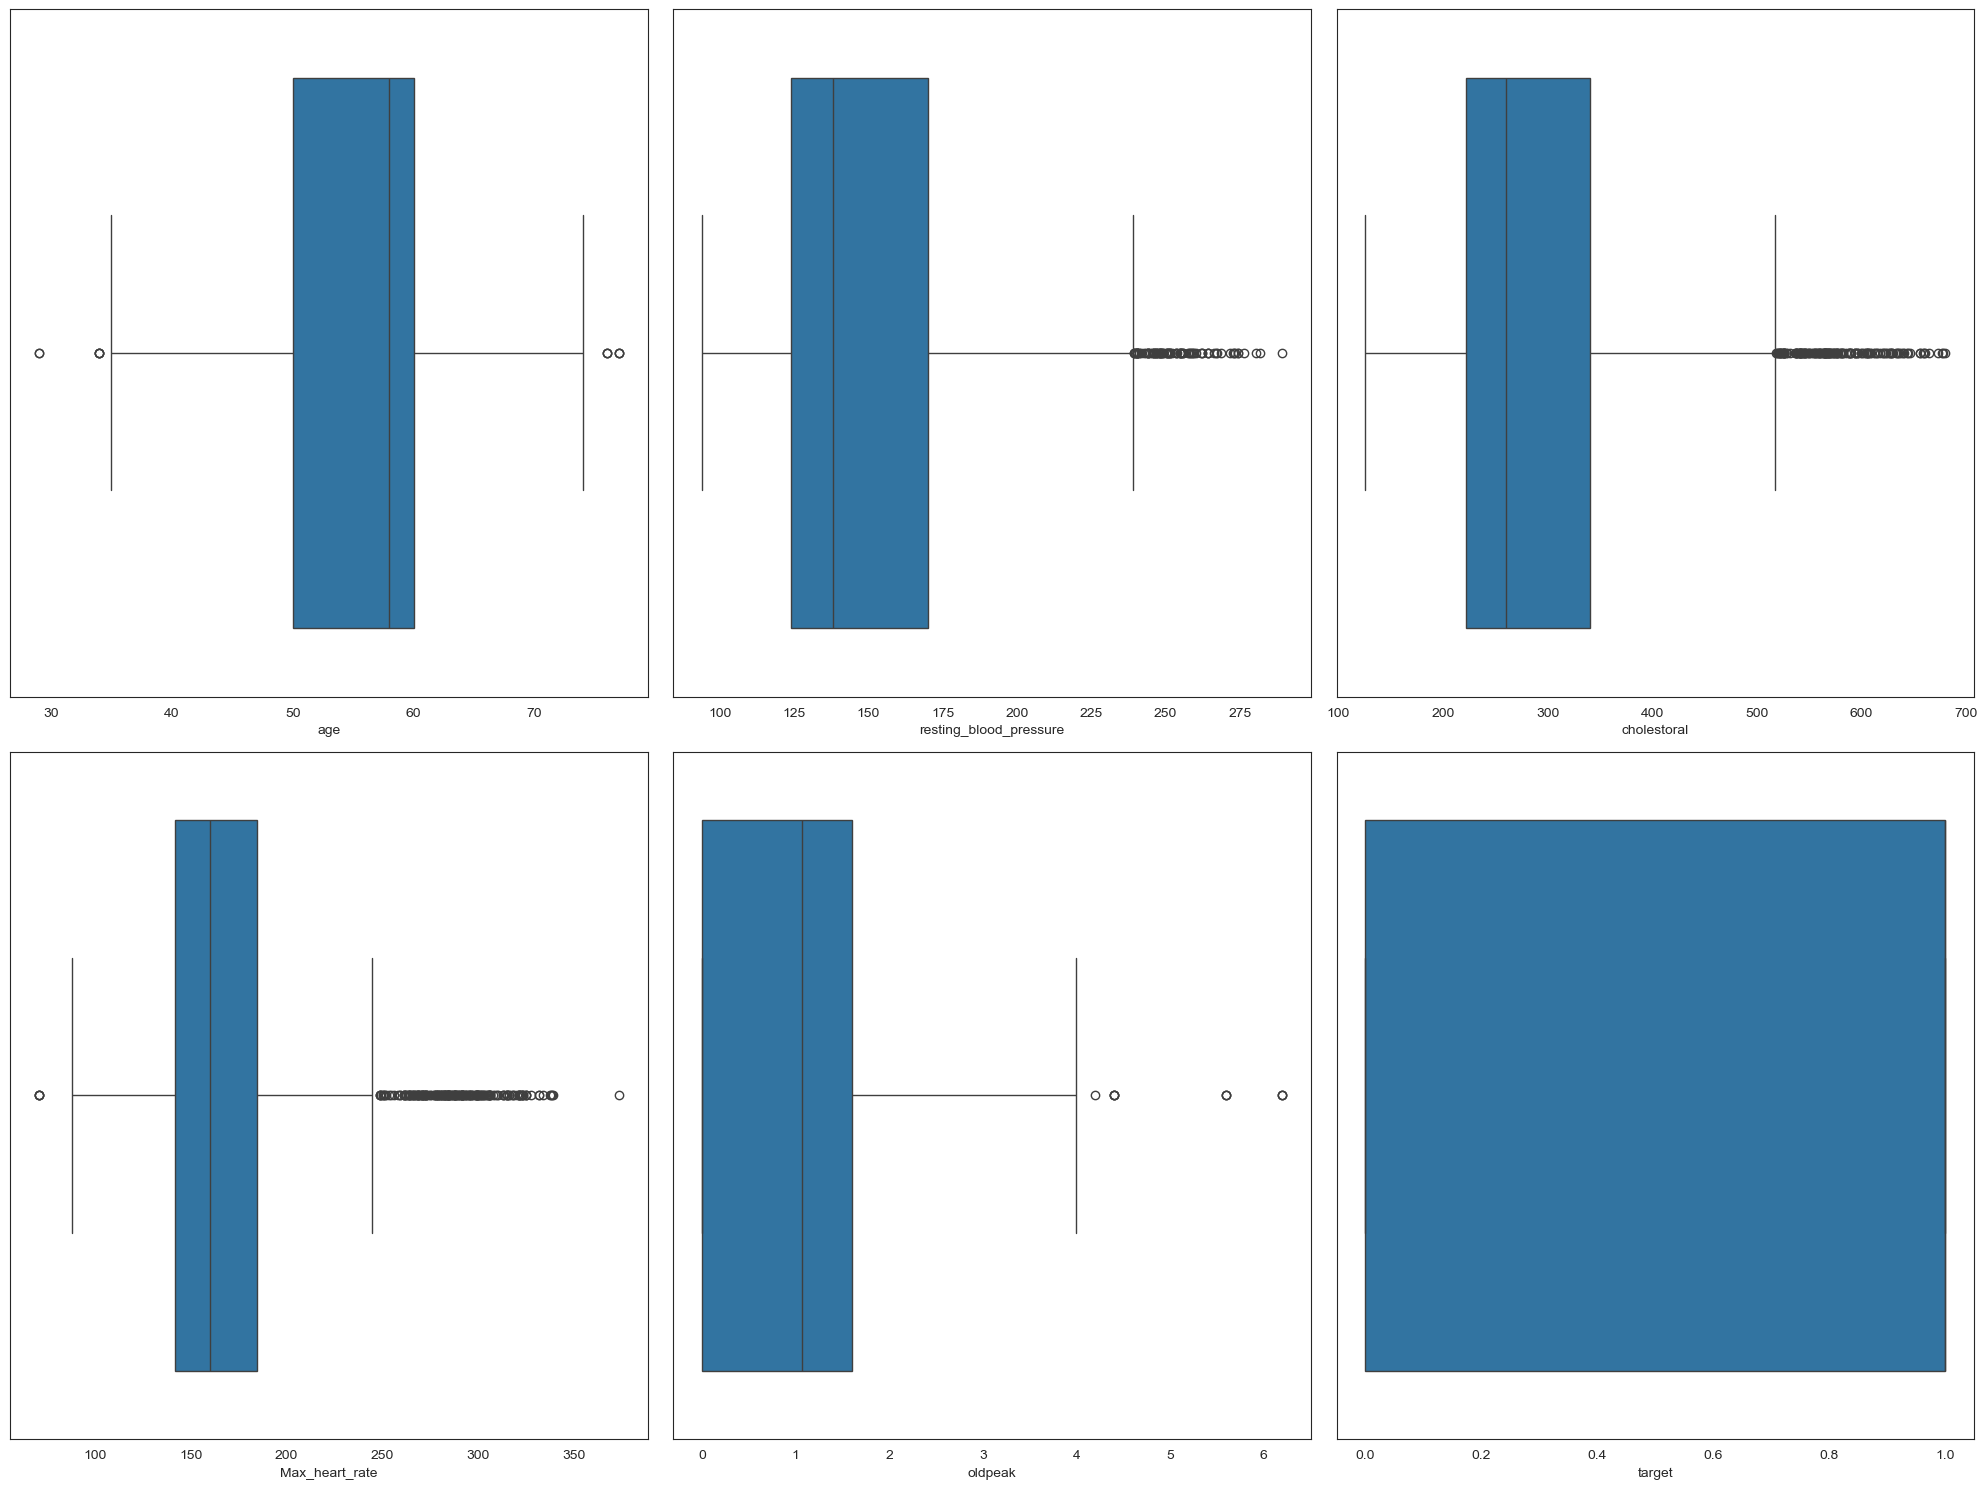

In [345]:
fig, axes = plt.subplots( nrows= 2, ncols=3, figsize = (20,15))
axes = axes.flatten()

for i , column in enumerate(num_features):
    ax = axes[i]
    sns.boxplot(data = data, x = data[column], ax=ax)

plt.tight_layout()
plt.show()

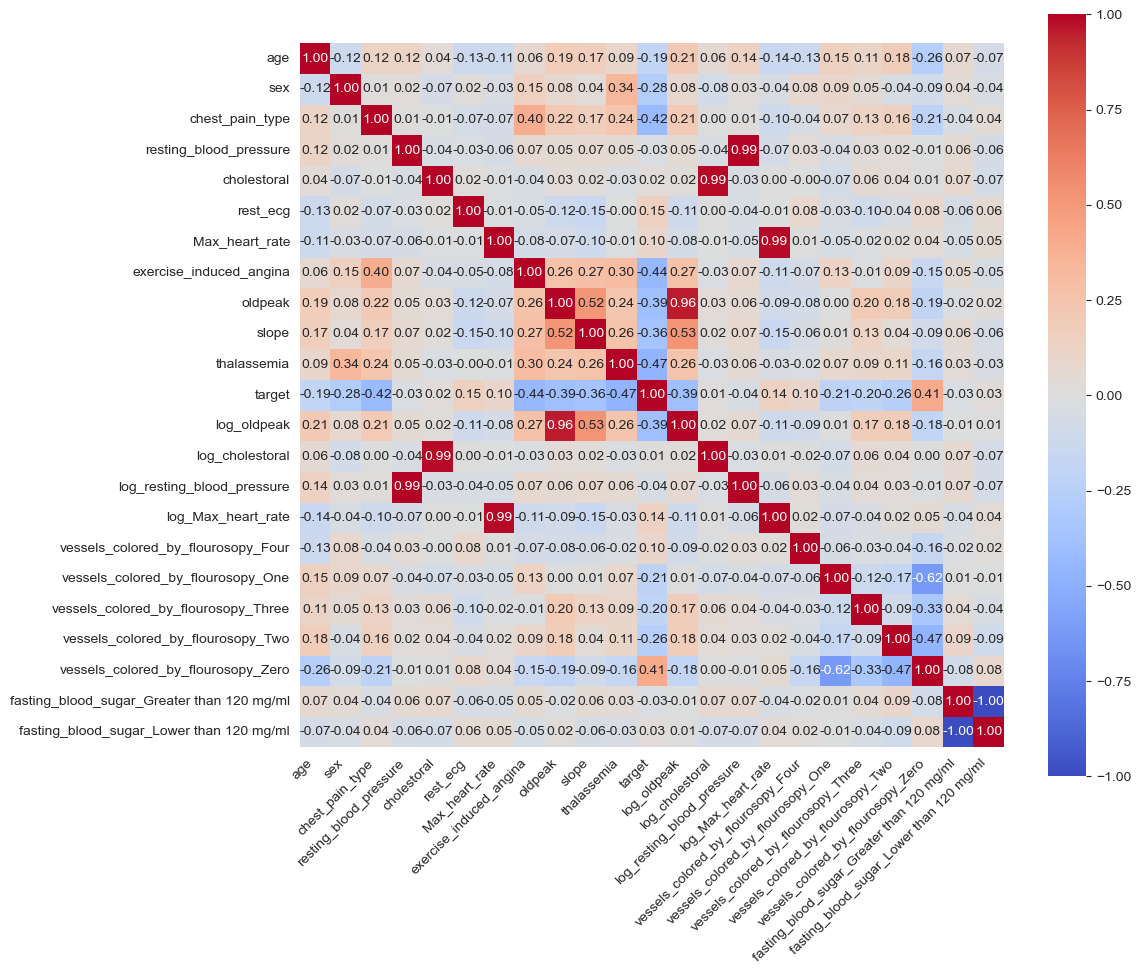

In [346]:
f, ax = plt.subplots(figsize=(12, 10))  
corr = data.corr()

sns.heatmap(corr, annot=True, square=True, ax=ax, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)  
plt.tight_layout()

plt.show()

C:\Users\Royal\AppData\Local\Temp\ipykernel_5476\2117930155.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.sex == 1]["cholestoral"], ax = ax[0])
C:\Users\Royal\AppData\Local\Temp\ipykernel_5476\2117930155.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.sex == 0]["cho

Text(0.5, 1.0, 'Distribution of cholestoral for Females')

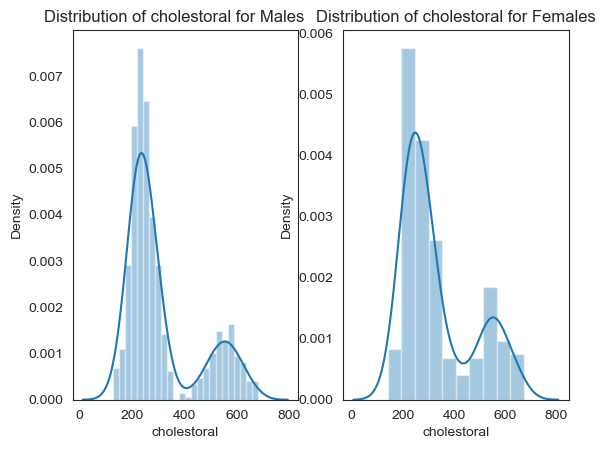

In [347]:
fig, axis = plt.subplots(nrows = 1, ncols = 2)
ax = axis.flatten()
sns.distplot(data[data.sex == 1]["cholestoral"], ax = ax[0])
ax[0].set_title("Distribution of cholestoral for Males     ")
sns.distplot(data[data.sex == 0]["cholestoral"], ax = ax[1])
ax[1].set_title("Distribution of cholestoral for Females")

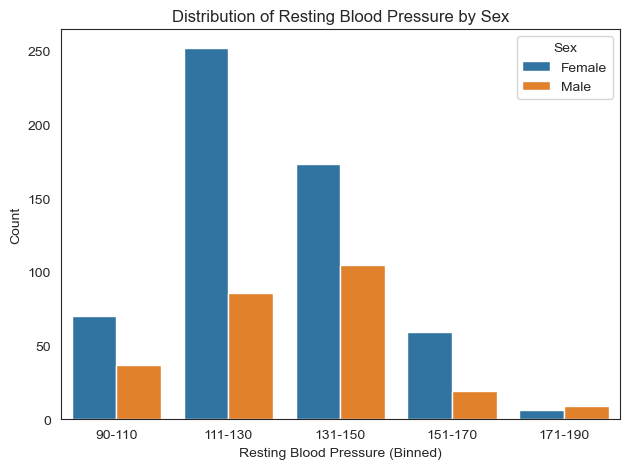

In [348]:
df['bp_bins'] = pd.cut(df['resting_blood_pressure'], 
                       bins=[90, 110, 130, 150, 170, 190], 
                       labels=['90-110', '111-130', '131-150', '151-170', '171-190'])

sns.countplot(data=df, x='bp_bins', hue='sex')
plt.xlabel("Resting Blood Pressure (Binned)")
plt.ylabel("Count")
plt.title("Distribution of Resting Blood Pressure by Sex")
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.tight_layout()
plt.show()

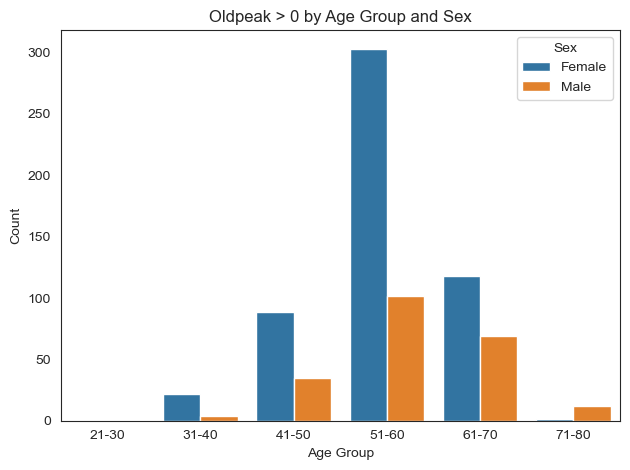

In [349]:
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80], 
                         labels=['21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

sns.countplot(data=df[df["oldpeak"] > 0], x="age_group", hue="sex")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Oldpeak > 0 by Age Group and Sex")
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.tight_layout()
plt.show()

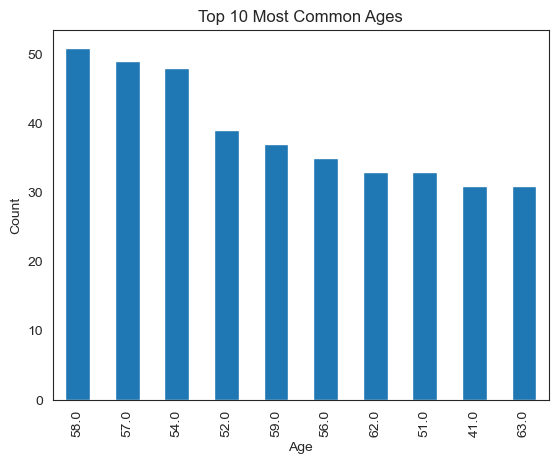

In [350]:
ax = data0['age'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Most Common Ages')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
plt.show()

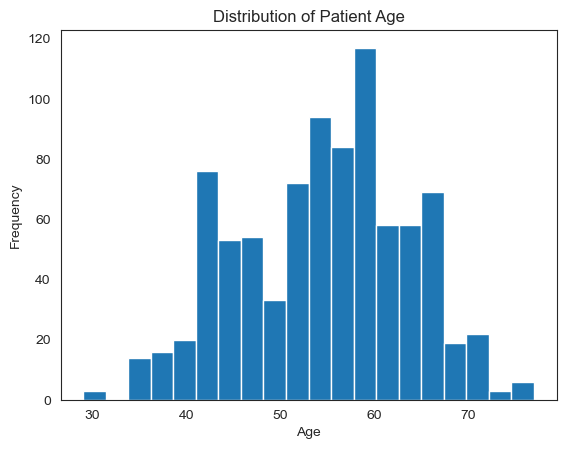

In [351]:
ax = data0['age'].plot(kind='hist',
                    bins=20,
                    title='Distribution of Patient Age')
ax.set_xlabel('Age')
plt.show()

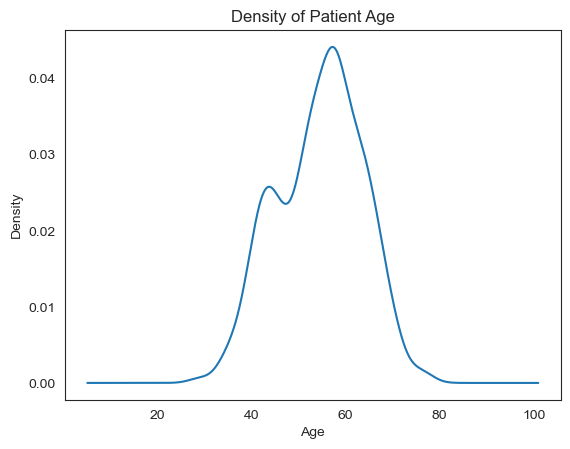

In [352]:
ax = data0['age'].plot(kind='kde', title='Density of Patient Age')
ax.set_xlabel('Age')
plt.show()


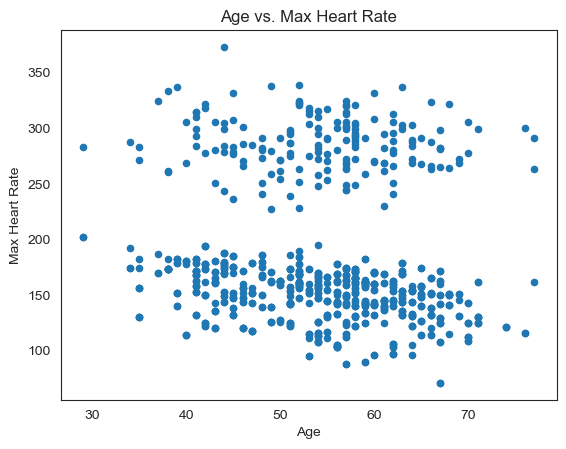

In [353]:
data0.plot(kind='scatter',
        x='age',
        y='Max_heart_rate',
        title='Age vs. Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show()

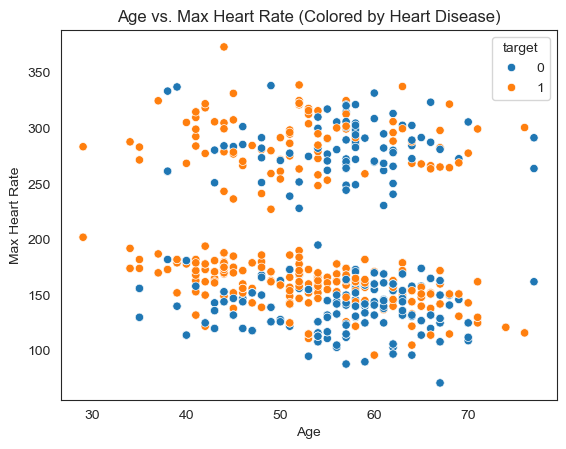

In [354]:
ax = sns.scatterplot(x='age',
                     y='Max_heart_rate',
                     hue='target',
                     data=data0)
ax.set_title('Age vs. Max Heart Rate (Colored by Heart Disease)')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show()

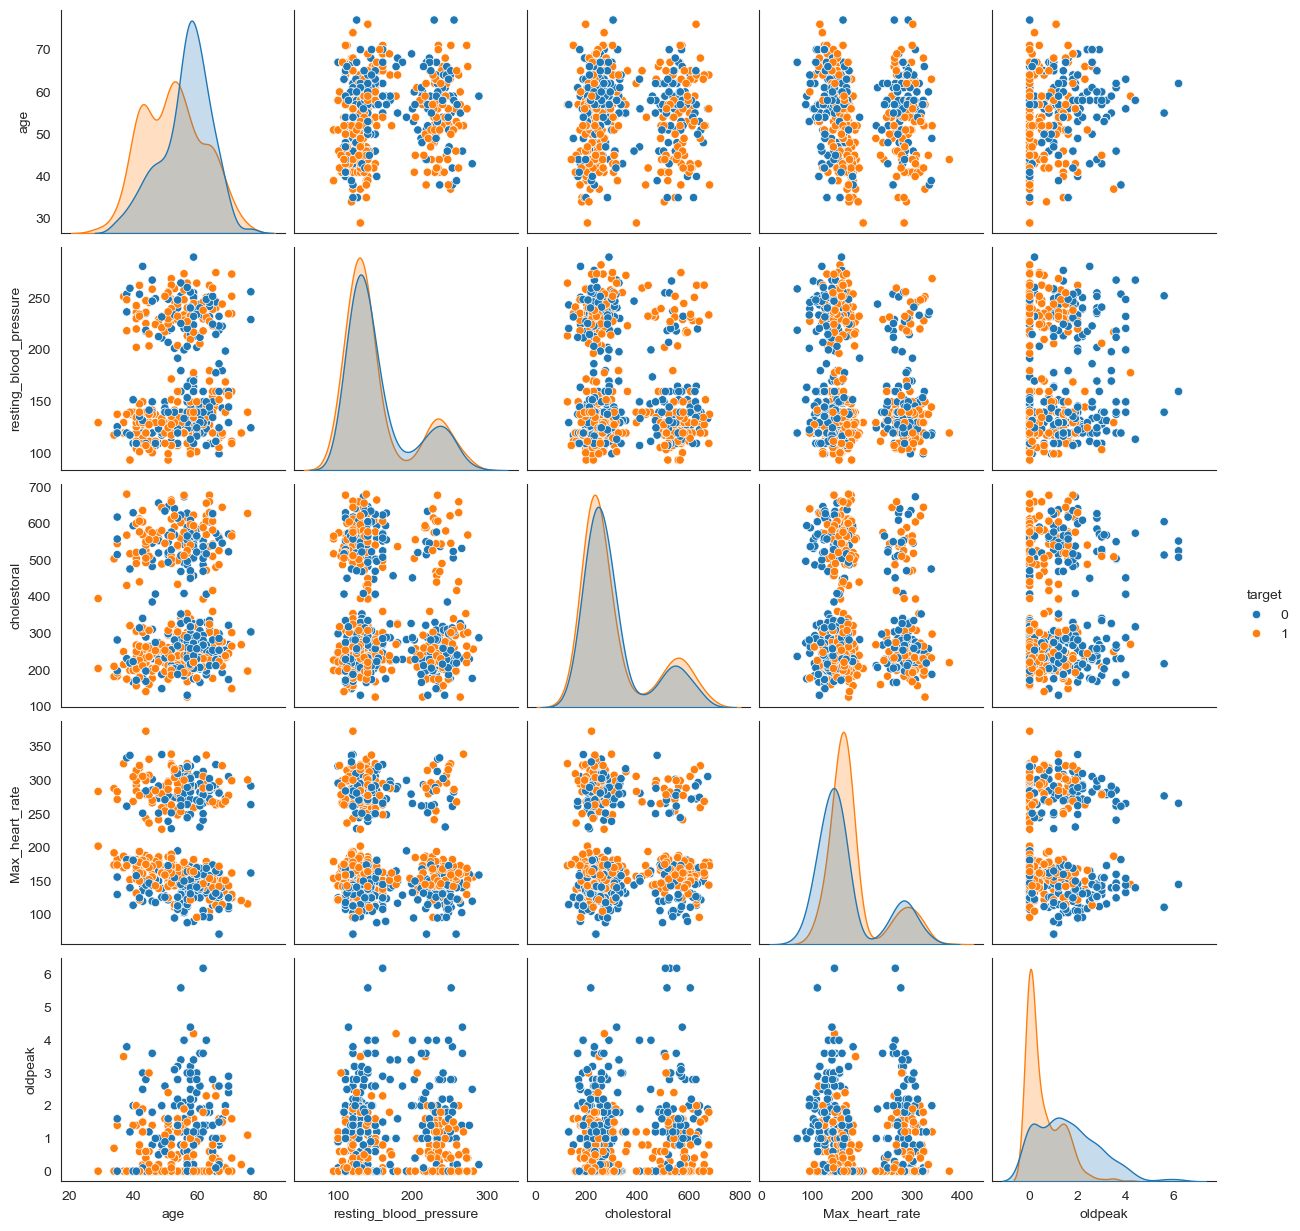

In [355]:
sns.pairplot(data0,
             vars=['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak'],
             hue='target')
plt.show()

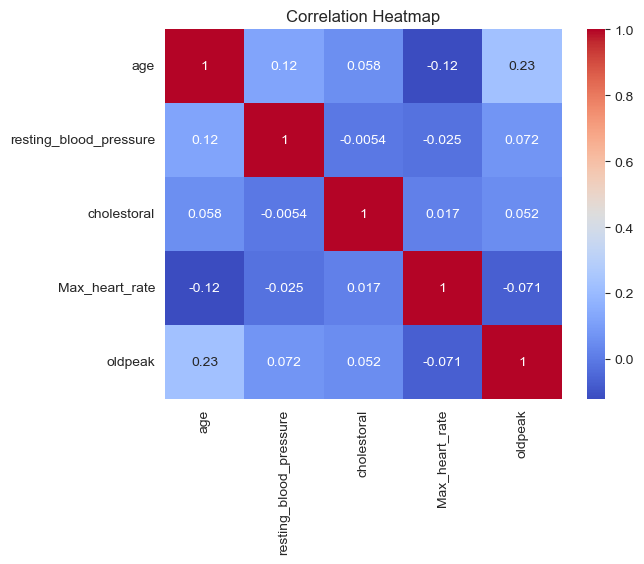

In [356]:
df_corr = data0[['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']].corr()

sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

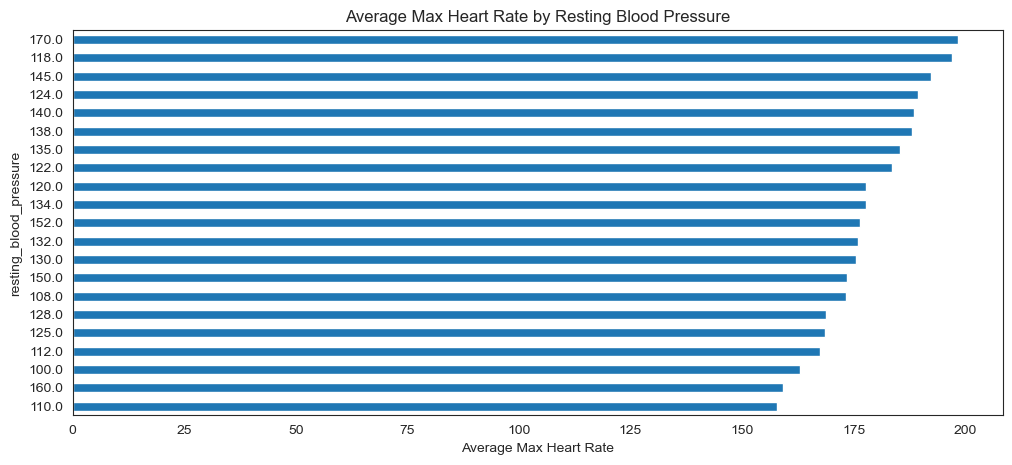

In [357]:
ax = data0.groupby('resting_blood_pressure')['Max_heart_rate'] \
    .agg(['mean', 'count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Max Heart Rate by Resting Blood Pressure')

ax.set_xlabel('Average Max Heart Rate')
plt.show()

In [358]:
data1=data.copy()

## Scaling

In [359]:
columns_to_scale = ["resting_blood_pressure", "cholestoral", "age", "Max_heart_rate", "oldpeak"]

scaler = StandardScaler()

scaled_array = scaler.fit_transform(data[columns_to_scale])

scaled_df = pd.DataFrame(scaled_array, columns=columns_to_scale, index=data.index)

data.loc[:, columns_to_scale] = scaled_df
data

age  sex  chest_pain_type  resting_blood_pressure  cholestoral  \
0    -0.371312    1                3               -0.658477    -0.748494   
1     0.345352    1                3               -0.338944    -0.813450   
2      1.77868    1                3               -0.232433    -1.022756   
3     0.345352    1                3               -0.168527     0.955429   
4     0.823128    0                3               -0.381549     1.236452   
...        ...  ...              ...                     ...          ...   
1019 -0.968532    1                3               -0.935405    -0.806233   
1020  0.464796    1                1               -0.338944    -0.683537   
1021   0.58424    1                3               -0.658477    -0.416492   
1022 -0.968532    1                3               -0.978010    -0.293795   
1023   -0.6102    0                3               -0.978010    -0.445361   

      rest_ecg  Max_heart_rate  exercise_induced_angina   oldpeak  slope  ...  \
0            2        0.772857                        0 -0.087047      0  ...   
1            1        1.226737                        1 -0.021861      2  ...   
2            2        2.024232                        1  1.404636      2  ...   
3            2       -0.307528                        0 -1.019348      0  ...   
4            2       -1.193958                        0  0.752025      1  ...   
...        ...             ...                      ...       ...    ...  ...   
1019         2       -0.597632                        0 -0.926118      0  ...   
1020         2       -0.259177                        1 -1.019348      0  ...   
1021         1       -0.629866                        1  1.591096      1  ...   
1022         2       -1.000555                        1 -0.087047      1  ...   
1023         1       -0.339762                        0 -0.021861      0  ...   

      log_cholestoral  log_resting_blood_pressure  log_Max_heart_rate  \
0            5.361292                    4.836282            5.433871   
1            5.318120                    4.948760            5.549838   
2            5.164786                    4.983607            5.725798   
3            6.107210                    5.003946            5.087596   
4            6.190358                    4.934474            4.672829   
...               ...                         ...                 ...   
1019         5.323010                    4.727388            4.969813   
1020         5.402677                    4.948760            5.105945   
1021         5.556828                    4.836282            4.955827   
1022         5.620401                    4.709530            4.779123   
1023         5.541264                    4.709530            5.075174   

      vessels_colored_by_flourosopy_Four  vessels_colored_by_flourosopy_One  \
0                                    0.0                                0.0   
1                                    0.0                                0.0   
2                                    0.0                                0.0   
3                                    0.0                                1.0   
4                                    0.0                                0.0   
...                                  ...                                ...   
1019                                 0.0                                0.0   
1020                                 0.0                                0.0   
1021                                 0.0                                0.0   
1022                                 0.0                                0.0   
1023                                 0.0                                0.0   

      vessels_colored_by_flourosopy_Three  vessels_colored_by_flourosopy_Two  \
0                                     0.0                                1.0   
1                                     0.0                                0.0   
2                                     0.0      

In [360]:
scaler = MinMaxScaler()

scaled_array = scaler.fit_transform(data[columns_to_scale])

scaled_df = pd.DataFrame(scaled_array, columns=columns_to_scale, index=data.index)

data1[columns_to_scale] = scaled_df

data1


age  sex  chest_pain_type  resting_blood_pressure  cholestoral  \
0     0.479167    1                3                0.158728     0.155135   
1     0.604167    1                3                0.235532     0.138900   
2     0.854167    1                3                0.261133     0.086587   
3     0.604167    1                3                0.276494     0.581004   
4     0.687500    0                3                0.225292     0.651242   
...        ...  ...              ...                     ...          ...   
1019  0.375000    1                3                0.092165     0.140703   
1020  0.625000    1                1                0.235532     0.171370   
1021  0.645833    1                3                0.158728     0.238113   
1022  0.375000    1                3                0.081924     0.268780   
1023  0.437500    0                3                0.081924     0.230898   

      rest_ecg  Max_heart_rate  exercise_induced_angina   oldpeak  slope  ...  \
0            2        0.519704                        0  0.161290      0  ...   
1            1        0.612905                        1  0.172568      2  ...   
2            2        0.776665                        1  0.419355      2  ...   
3            2        0.297855                        0  0.000000      0  ...   
4            2        0.115832                        0  0.306452      1  ...   
...        ...             ...                      ...       ...    ...  ...   
1019         2        0.238284                        0  0.016129      0  ...   
1020         2        0.307783                        1  0.000000      0  ...   
1021         1        0.231665                        1  0.451613      1  ...   
1022         2        0.155546                        1  0.161290      1  ...   
1023         1        0.291236                        0  0.172568      0  ...   

      log_cholestoral  log_resting_blood_pressure  log_Max_heart_rate  \
0            5.361292                    4.836282            5.433871   
1            5.318120                    4.948760            5.549838   
2            5.164786                    4.983607            5.725798   
3            6.107210                    5.003946            5.087596   
4            6.190358                    4.934474            4.672829   
...               ...                         ...                 ...   
1019         5.323010                    4.727388            4.969813   
1020         5.402677                    4.948760            5.105945   
1021         5.556828                    4.836282            4.955827   
1022         5.620401                    4.709530            4.779123   
1023         5.541264                    4.709530            5.075174   

      vessels_colored_by_flourosopy_Four  vessels_colored_by_flourosopy_One  \
0                                    0.0                                0.0   
1                                    0.0                                0.0   
2                                    0.0                                0.0   
3                                    0.0                                1.0   
4                                    0.0                                0.0   
...                                  ...                                ...   
1019                                 0.0                                0.0   
1020                                 0.0                                0.0   
1021                                 0.0                                0.0   
1022                                 0.0                                0.0   
1023                                 0.0                                0.0   

      vessels_colored_by_flourosopy_Three  vessels_colored_by_flourosopy_Two  \
0                                     0.0                                1.0   
1                                     0.0                                0.0   
2                                     0.0      

In [361]:
X = data.drop("target", axis=1)
y = data["target"]

## PCA

Explained Variance Ratio: [0.24240253 0.13311153 0.11341103 0.10170431 0.09855528]


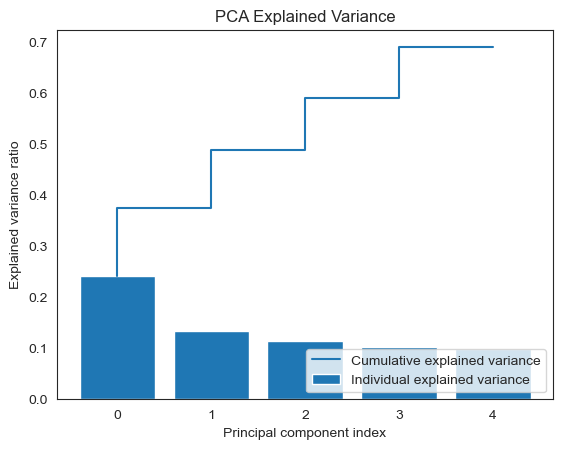

In [362]:
df = data.copy()
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data=principalComponents, columns=['A', 'B', 'C', 'D', 'E'])

finalDf = pd.concat([principalDf, y.reset_index(drop=True)], axis=1)

# finalDf.to_csv("HeartDiseaseTrain-Test_PCA.csv", index=False, header=True)

exvar = pca.explained_variance_ratio_
cexvarsum = np.cumsum(exvar)

print("Explained Variance Ratio:", exvar)

plt.bar(range(0, len(exvar)), exvar, label='Individual explained variance')
plt.step(range(0, len(cexvarsum)), cexvarsum, label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='lower right')
plt.title('PCA Explained Variance')
plt.show()


## RFE

In [363]:
df = data.copy()

model = LogisticRegression(max_iter=1000)

rfe = RFE(estimator=model, n_features_to_select=2)
rfe = rfe.fit(X , y)

print("Feature Ranking:", rfe.ranking_)

selected_features_mask = rfe.support_
print("Selected Features Mask:", selected_features_mask)

selected_feature_names = X.columns[selected_features_mask]
print("Selected Feature Names:", selected_feature_names.tolist())

X_selected = X[selected_feature_names]


Feature Ranking: [21  3  6 20 11  7 16  1 12  4  9 15 10 19  8  1 14 13  5  2 17 18]
Selected Features Mask: [False False False False False False False  True False False False False
 False False False  True False False False False False False]
Selected Feature Names: ['exercise_induced_angina', 'vessels_colored_by_flourosopy_Four']


## Model training 

In [364]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## SVC

In [365]:
model1 = SVC(kernel='linear')
model1.fit(X_train, Y_train)

SVC(kernel='linear')

In [366]:
Y_pred = model1.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

# Display the accuracy and classification report
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.8613138686131386

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       137
           1       0.85      0.88      0.86       137

    accuracy                           0.86       274
   macro avg       0.86      0.86      0.86       274
weighted avg       0.86      0.86      0.86       274



In [367]:
print(f'model accuracy on training set : {model1.score(X_train, Y_train)}')
print(f'modle accuracy on test set : {model1.score(X_test, Y_test)}') 

model accuracy on training set : 0.8555729984301413
modle accuracy on test set : 0.8613138686131386


## Logistic regression

In [368]:
model2 = LogisticRegression(max_iter=2000)
model2.fit(X_train, Y_train)

LogisticRegression(max_iter=2000)

In [369]:
Y_pred = model2.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

# Display the accuracy and classification report
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.8467153284671532

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       137
           1       0.83      0.87      0.85       137

    accuracy                           0.85       274
   macro avg       0.85      0.85      0.85       274
weighted avg       0.85      0.85      0.85       274



In [370]:
print(f'model accuracy on training set : {model2.score(X_train, Y_train)}')
print(f'modle accuracy on test set : {model2.score(X_test, Y_test)}') 

model accuracy on training set : 0.8540031397174255
modle accuracy on test set : 0.8467153284671532


## Random forest

In [371]:
model3=RandomForestClassifier()
model3.fit(X_train,Y_train)

RandomForestClassifier()

In [372]:
Y_pred = model3.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

# Display the accuracy and classification report
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.9306569343065694

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       137
           1       0.93      0.93      0.93       137

    accuracy                           0.93       274
   macro avg       0.93      0.93      0.93       274
weighted avg       0.93      0.93      0.93       274



In [373]:
print(f'model accuracy on training set : {model3.score(X_train, Y_train)}')
print(f'modle accuracy on test set : {model3.score(X_test, Y_test)}') 

model accuracy on training set : 1.0
modle accuracy on test set : 0.9306569343065694


## Desicion tree

In [374]:
model4=tree.DecisionTreeClassifier()
model4.fit(X_train,Y_train)

DecisionTreeClassifier()

In [375]:
Y_pred = model4.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

# Display the accuracy and classification report
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.8759124087591241

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       137
           1       0.88      0.87      0.88       137

    accuracy                           0.88       274
   macro avg       0.88      0.88      0.88       274
weighted avg       0.88      0.88      0.88       274



In [376]:
print(f'model accuracy on training set : {model4.score(X_train, Y_train)}')
print(f'modle accuracy on test set : {model4.score(X_test, Y_test)}') 

model accuracy on training set : 1.0
modle accuracy on test set : 0.8759124087591241


## KNN

In [377]:
model5=KNeighborsClassifier(n_neighbors=5)
model5.fit(X_train,Y_train)

KNeighborsClassifier()

In [378]:
Y_pred = model5.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

# Display the accuracy and classification report
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Accuracy: 0.8321167883211679

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       137
           1       0.83      0.84      0.83       137

    accuracy                           0.83       274
   macro avg       0.83      0.83      0.83       274
weighted avg       0.83      0.83      0.83       274



In [379]:
print(f'model accuracy on training set : {model5.score(X_train, Y_train)}')
print(f'modle accuracy on test set : {model5.score(X_test, Y_test)}') 

model accuracy on training set : 0.8775510204081632
modle accuracy on test set : 0.8321167883211679


## Best 2 models Randomforest and Desicion tree